# Совместная работа #

### Подключение библиотек ###

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("real_estate_data.csv", low_memory=False)

In [5]:
df.head().T

,0,1,2,3,4
id,1,2,3,4,5
type,Konut,Konut,Konut,Konut,Konut
sub_type,Rezidans,Daire,Daire,Rezidans,Rezidans
start_date,12/10/18,2/13/19,10/9/18,9/10/18,12/10/18
end_date,1/9/19,NaN,11/8/18,10/10/18,1/9/19
listing_type,2,1,1,1,1
tom,30,14,30,30,30
building_age,0,0,0,3,0
total_floor_count,20 ve üzeri,20 ve üzeri,1,20 ve üzeri,20 ve üzeri
floor_no,2,20 ve üzeri,Yüksek Giriş,20 ve üzeri,2


Посмотрим на общую информацию

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

Признак furnished не имеет данных. <br>
Так же видны пропуски по нескольким признакам

# Описание данных #

* id - Уникальный идентификационный номер объявления о недвижимости.
* type - Основной тип объекта недвижимости (например, "Konut" - Жилье).
* start_date - Дата активации и размещения объявления на рынке.
* end_date - Дата снятия объявления с рынка (например, после продажи).
* listing_type - Тип списка: на продажу ("Satılık") или в аренду ("Kiralık").
* tom - Время, в течение которого объявление было активно на рынке (Time on Market).
* building_age - Возраст здания, в котором находится объект.
* total_floor_count - Общее количество этажей в здании.
* floor_no - Этаж, на котором расположен объект, включая специальные категории (например, "Цокольный", "Пентхаус").
* room_count - Количество комнат в формате "X+Y" (спальни + гостиные).
* size - Площадь объекта в квадратных метрах (m²).
* address - Адрес объекта, обычно включающий город, район и микрорайон.
* furnished - Уровень меблировки объекта (например, "С мебелью", "Без мебели").
* heating_type - Тип системы отопления в здании (например, "Центральное газовое", "Индивидуальный котел").
* price - Цена объекта недвижимости.
* price_currency - Валюта, в которой указана цена (например, TRY, USD, EUR).

Целевые признаки
* Price (Цена объекта недвижимости)
* sub_type (Подтип объекта недвижимости, уточняющий категорию).

# Разведочный анализ данных #

Выведем размер данных

In [13]:
df.shape

(403487, 17)

403487 записей и 17 признаков

Дополнительно выведем типы данных

In [16]:
df.dtypes

id                     int64
type                  object
sub_type              object
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age          object
total_floor_count     object
floor_no              object
room_count            object
size                 float64
address               object
furnished            float64
heating_type          object
price                float64
price_currency        object
dtype: object

Многие признаки строковые <br>
В дальшейшем преобразуем данные и конвертируем типы

Просмотрим статистическую информацию, возможно увидим ошибки или выбросы

In [19]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,403487.0,NaN,NaN,NaN,201744.0,116476.80837,1.0,100872.5,201744.0,302615.5,403487.0
type,403487,1,Konut,403487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_type,403487,12,Daire,354549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_date,403487,181,10/11/18,4064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_date,266298,181,12/19/18,3048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listing_type,403487.0,NaN,NaN,NaN,1.294235,0.467733,1.0,1.0,1.0,2.0,3.0
tom,403487.0,NaN,NaN,NaN,57.022739,44.358933,0.0,29.0,40.0,90.0,180.0
building_age,376097,14,0,140174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_floor_count,375466,12,4,83082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor_no,368191,35,2,65864,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видны аномальные значения цены. Некоторая информация отсутствует из за строкового типа

## Предварительеая обработка ##

Посмотрим на количество пропусков для каждого признака

In [23]:
df.isnull().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

### Удалим столбец с пустыми значениями 

In [25]:
df = df.drop('furnished', axis=1)

In [26]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,2/21/19,NaN,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


### Разберемся с пропусками дат 
Даты зависят от поля "tom"

In [28]:
# Преобразуем даты в datetime
df['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%y')
df['end_date'] = pd.to_datetime(df['end_date'], format='%m/%d/%y', errors='coerce')

# Заполняем пропуски в end_date: start_date + tom (в днях)
mask = df['end_date'].isna()
df.loc[mask, 'end_date'] = df.loc[mask, 'start_date'] + pd.to_timedelta(df.loc[mask, 'tom'], unit='D')

# Возвращаем даты в исходный строковый формат (месяц/день/год)
df['start_date'] = df['start_date'].dt.strftime('%m/%d/%y')
df['end_date'] = df['end_date'].dt.strftime('%m/%d/%y')

In [29]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


Проверим на отрицательные значения

In [31]:
native_values = df[df['tom'] < 0]
print(len(native_values))

0


In [32]:
df.isnull().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date                  0
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
heating_type          27970
price                   715
price_currency          715
dtype: int64

In [33]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,NaN,NaN,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


### Устанавливаем общее количество этажей

In [35]:
# Просмотр всех уникальных значений в столбце total_floor_count
unique_values = df['total_floor_count'].unique()
print("Уникальные значения в total_floor_count:")

# Преобразуем все значения в строки для корректного вывода
for value in unique_values:
    print(f"'{value}'")

# Дополнительная информация о столбце
print(f"\nКоличество уникальных значений: {len(unique_values)}")


Уникальные значения в total_floor_count:
'20 ve üzeri'
'1'
'10-20 arası'
'4'
'2'
'3'
'8'
'7'
'6'
'5'
'10'
'nan'
'9'

Количество уникальных значений: 13


In [36]:
df_processed = df.copy()

# Функция для преобразования значений
def process_floor_count(value):
    if pd.isna(value) or value == 'nan':
        return np.nan
    
    # Если значение уже числовое
    if isinstance(value, (int, float)) and not pd.isna(value):
        return value
    
    value = str(value).strip()
    
    # Обработка "ve üzeri" (например: "20 ve üzeri" -> 21)
    if 've üzeri' in value:
        num = value.split('ve')[0].strip()
        try:
            return int(num) + 1
        except:
            return np.nan
    
    # Обработка "arası" (например: "10-20 arası" -> 15)
    elif 'arası' in value:
        numbers = value.split('arası')[0].strip()
        if '-' in numbers:
            try:
                low, high = map(int, numbers.split('-'))
                return (low + high) // 2 
            except:
                return np.nan
    try:
        return int(value)
    except:
        return np.nan

# Применяем функцию преобразования
df_processed['total_floor_count_processed'] = df_processed['total_floor_count'].apply(process_floor_count)

# Вычисляем медиану
median_value = df_processed['total_floor_count_processed'].median()

# Заполняем пропущенные значения медианой
df_processed['total_floor_count_processed'] = df_processed['total_floor_count_processed'].fillna(median_value)

# Преобразуем в целые числа
df_processed['total_floor_count_processed'] = df_processed['total_floor_count_processed'].astype(int)

# Уникальные значения после обработки
print("\nУникальные значения после обработки:")
print(sorted(df_processed['total_floor_count_processed'].unique()))

df['total_floor_count'] = df_processed['total_floor_count_processed']


Уникальные значения после обработки:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 21]


In [37]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,NaN,4,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,NaN,4,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,NaN,4,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,NaN,4,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


In [38]:
df.isnull().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date                  0
listing_type              0
tom                       0
building_age          27390
total_floor_count         0
floor_no              35296
room_count                0
size                 146006
address                   0
heating_type          27970
price                   715
price_currency          715
dtype: int64

### Заменим значение NaN на медианные значение для столбца building_age

Удалим отрицательные значения и заменим NaN на медианные значения

In [41]:
df['building_age'] = pd.to_numeric(df['building_age'], errors='coerce')

# Вычисляем медиану и округляем до целого
median_age = round(df['building_age'].median())

# Заменяем NaN на округленную медиану и преобразуем к int
df['building_age'] = df['building_age'].fillna(median_age).astype(int)

# Проверяем результат
print(f"Медианное значение возраста здний: {median_age}")
print(f"Тип данных: {df['building_age'].dtype}")
print(f"Уникальные значения: {sorted(df['building_age'].unique()[:10])}")  

Медианное значение возраста здний: 0
Тип данных: int32
Уникальные значения: [0, 1, 2, 3, 4, 5]


In [42]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,NaN,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           403487 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       403487 non-null  int32  
 8   total_floor_count  403487 non-null  int32  
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  heating_type       375517 non-null  object 
 14  price              402772 non-null  float64
 15  price_currency     402772 non-null  object 
dtypes:

### Разберемся с floor_no 
floor_no - Этаж, на котором расположен объект, включая специальные категории (например, "Цокольный", "Пентхаус").

In [45]:
df_processed = df.copy()

# Словарь для преобразования специальных категорий
floor_mapping = {
    'Yüksek Giriş': 1,      # Высокий вход
    'Bahçe katı': 0,        # Садовый этаж
    'Giriş Katı': 0,        # Входной этаж
    'Zemin Kat': 0,         # Цокольный этаж
    'Bodrum Kat': -1,       # Подвальный этаж
    'Asma Kat': 1,          # Мезонин
    'Müstakil': 0,          # Отдельный дом
    'Komple': 0,            # Полностью
    '20 ve üzeri': 20,      # 20 и выше
}

# Функция для преобразования этажа
def process_floor_no(floor_value, total_floors):
    # Обработка пропущенных значений
    if pd.isna(floor_value) or floor_value == 'nan':
        return np.nan
    
    # Преобразуем в строку для обработки
    floor_str = str(floor_value).strip()
    
    # Проверяем специальные категории
    if floor_str in floor_mapping:
        return floor_mapping[floor_str]
    
    # Обработка числовых значений
    try:
        floor_num = int(floor_str)
        
        # Проверка на аномалии: этаж не может быть больше общего количества этажей
        if not pd.isna(total_floors) and floor_num > total_floors:
            # Если этаж больше общего количества, возвращаем общее количество
            return total_floors
        
        # Проверка на отрицательные значения (кроме подвала)
        if floor_num < -1:  # Подвал может быть -1
            return -1
        
        return floor_num
        
    except ValueError:
        # Если значение не преобразуется в число и не в словаре, возвращаем NaN
        return np.nan

# Применяем функцию преобразования
df_processed['floor_no_processed'] = df_processed.apply(
    lambda row: process_floor_no(row['floor_no'], row['total_floor_count']), 
    axis=1
)

# Анализ результатов
print("Статистика до обработки:")
print(f"Уникальные значения в floor_no: {df_processed['floor_no'].unique()[:10]}")

print("\nСтатистика после обработки:")
print(f"Уникальные значения: {sorted(df_processed['floor_no_processed'].dropna().unique())}")

# Проверка аномалий
anomalies = df_processed[df_processed['floor_no_processed'] > df_processed['total_floor_count']]
print(f"\nАномалий (этаж > общего этажа): {len(anomalies)}")

# Заполнение пропущенных значений (медианой или модой)
# Медиана для числовых значений
median_floor = df_processed['floor_no_processed'].median()
print(f"Медиана этажа: {median_floor}")

# Заполняем пропущенные значения
df_processed['floor_no_processed'] = df_processed['floor_no_processed'].fillna(median_floor)

# Преобразуем в целые числа
df_processed['floor_no_processed'] = df_processed['floor_no_processed'].astype(int)

# Финальная проверка
print("\nФинальная статистика:")
print(df_processed['floor_no_processed'].describe())
print(f"\nДиапазон значений: от {df_processed['floor_no_processed'].min()} до {df_processed['floor_no_processed'].max()}")

# Заменяем исходный столбец обработанным
df['floor_no'] = df_processed['floor_no_processed']

Статистика до обработки:
Уникальные значения в floor_no: ['2' '20 ve üzeri' 'Yüksek Giriş' '10' '14' nan 'Kot 2' 'Asma Kat'
 'Bahçe katı' '11']

Статистика после обработки:
Уникальные значения: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

Аномалий (этаж > общего этажа): 116
Медиана этажа: 2.0

Финальная статистика:
count    403487.000000
mean          2.781953
std           2.846688
min          -1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: floor_no_processed, dtype: float64

Диапазон значений: от -1 до 20


##  Что мы сделали:

#### Проблема была в том, что:

В столбце "Этаж" были не только цифры, но и специальные описания на турецком языке, например:

"Yüksek Giriş" (Высокий вход), "Bodrum Kat" (Подвал) ,"20 ve üzeri" (20 и выше)

### Исправим на:

"Yüksek Giriş" → 1

"Bodrum Kat" → -1 (подвал ниже нуля)

"20 ve üzeri" → 20


In [47]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


### Далее исправляем запись количества комнат 

Посмотрим на уникальные значения в этом столбце для выявления аномалий

In [50]:
un = df['room_count'].unique()
for value in sorted(un):
    print(f"'{value}'")

'+'
'0+0'
'1+0'
'1+1'
'10+0'
'10+1'
'10+2'
'10+3'
'10+4'
'10+5'
'11+3'
'15+5'
'2+1'
'2+2'
'3+1'
'3+2'
'4+1'
'4+2'
'4+3'
'5+1'
'5+2'
'5+3'
'6+1'
'6+2'
'6+3'
'7+1'
'7+2'
'7+3'
'8+1'
'8+2'
'8+3'
'8+4'
'9+1'
'9+2'
'9+3'
'9+4'
'9+5'


Перделаем в целочисленный вид, вместо плюсов возьмём медианное значение

In [52]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,2+1,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


In [53]:
def convert_room_count(room_value):
    if pd.isna(room_value) or room_value == 'nan':
        return np.nan
    
    # Если значение уже число
    if isinstance(room_value, (int, float)):
        return room_value
    
    room_str = str(room_value).strip()
    
    # Обработка специальных случаев
    if room_str == '+':
        return np.nan
    
    # Обработка формата "X+Y"
    if '+' in room_str:
        try:
            parts = room_str.split('+')
            if len(parts) == 2:
                rooms = int(parts[0])  # количество комнат
                living_rooms = int(parts[1])  # количество гостиных
                return rooms + living_rooms  # общее количество комнат
        except:
            return np.nan
    
    # Попытка преобразовать в число
    try:
        return int(room_str)
    except:
        return np.nan

# Сохраняем оригинальные значения для сравнения (опционально)
original_room_count = df['room_count'].copy()

# Преобразуем значения прямо в столбце room_count
df['room_count'] = df['room_count'].apply(convert_room_count)

# Заполняем пропущенные значения медианой
median_rooms = df['room_count'].median()
df['room_count'] = df['room_count'].fillna(median_rooms)

# Преобразуем в целые числа
df['room_count'] = df['room_count'].astype(int)

# Проверяем результаты
print("Результаты преобразования:")
print(f"Медианное значение: {median_rooms}")
print(f"Диапазон значений: от {df['room_count'].min()} до {df['room_count'].max()}")
print(f"Уникальные значения: {sorted(df['room_count'].unique())}")

# Показываем примеры преобразования
print("\nПримеры преобразования:")
for i in range(10):
    original = original_room_count.iloc[i] if i < len(original_room_count) else "N/A"
    new_value = df['room_count'].iloc[i] if i < len(df) else "N/A"
    print(f"'{original}' → {new_value}")


Результаты преобразования:
Медианное значение: 4.0
Диапазон значений: от 0 до 20
Уникальные значения: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]

Примеры преобразования:
'2+1' → 3
'1+0' → 1
'2+1' → 3
'6+1' → 7
'2+1' → 3
'1+1' → 2
'3+1' → 4
'4+1' → 5
'3+1' → 4
'2+2' → 4


In [54]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


### Исправим столбец size

In [56]:
# Просмотр всех уникальных значений в столбце size
unique_sizes = df['size'].unique()
print("Все уникальные значения в size:")
for value in sorted(unique_sizes, key=lambda x: str(x)):
    print(f"'{value}'")

Все уникальные значения в size:
'1.0'
'10.0'
'100.0'
'1000.0'
'10000.0'
'1002.0'
'1004.0'
'1008.0'
'101.0'
'1011.0'
'1015.0'
'101824.0'
'102.0'
'1020.0'
'102265.0'
'103.0'
'1030.0'
'104.0'
'1040.0'
'1044.0'
'1046.0'
'105.0'
'1050.0'
'10599.0'
'106.0'
'1060.0'
'107.0'
'1070.0'
'107319.0'
'108.0'
'1085.0'
'109.0'
'11.0'
'110.0'
'1100.0'
'11000.0'
'110000.0'
'111.0'
'1110.0'
'1111.0'
'111111.0'
'111472.0'
'112.0'
'1122.0'
'113.0'
'1130.0'
'114.0'
'1140.0'
'1144.0'
'1147.0'
'115.0'
'1150.0'
'1155.0'
'11580.0'
'116.0'
'1165.0'
'117.0'
'1170.0'
'118.0'
'1180.0'
'119.0'
'1190.0'
'1194.0'
'1199.0'
'12.0'
'120.0'
'1200.0'
'120000.0'
'1203.0'
'121.0'
'122.0'
'1226.0'
'123.0'
'1235.0'
'124.0'
'125.0'
'1250.0'
'125000.0'
'1255.0'
'126.0'
'127.0'
'128.0'
'129.0'
'1295.0'
'13.0'
'130.0'
'1300.0'
'13000.0'
'1301.0'
'131.0'
'1310.0'
'132.0'
'1320.0'
'133.0'
'1338.0'
'134.0'
'135.0'
'1350.0'
'136.0'
'1365.0'
'1368.0'
'137.0'
'1374.0'
'13751.0'
'1377.0'
'138.0'
'1380.0'
'1385.0'
'139.0'
'14.0'
'140.0'
'

### Обработаем аномальные значения и NaN

In [58]:
df['size'] = pd.to_numeric(df['size'], errors='coerce')

# Функция для определения аномальных значений
def is_anomalous_size(size, room_count):
    if pd.isna(size) or pd.isna(room_count) or room_count == 0:  # Added check for room_count == 0
        return False
    
    # Средняя площадь на комнату (примерно 20-50 м² на комнату)
    avg_size_per_room = size / room_count
    
    # Аномалии: слишком большая площадь на комнату или общая площадь
    return (avg_size_per_room > 200) or (size > 1000 and room_count < 5) or (size > 5000)

# Создаем маску аномальных значений
anomalous_mask = df.apply(lambda row: is_anomalous_size(row['size'], row['room_count']), axis=1)

print(f"Найдено аномальных значений: {anomalous_mask.sum()}")

# Функция для расчета примерной площади на основе количества комнат
def estimate_size(room_count):
    # Проверка на NaN или 0
    if pd.isna(room_count) or room_count == 0:
        return 45  # значение по умолчанию для нулевых или отсутствующих значений
    
    # Средние значения площади для разного количества комнат
    size_estimates = {
        1: 45,   2: 65,   3: 85,   4: 105,  5: 125,
        6: 145,  7: 165,  8: 185,  9: 205,  10: 225,
        11: 245, 12: 265, 13: 285, 14: 305, 15: 325,
        16: 345, 17: 365, 18: 385, 19: 405, 20: 425
    }
    
    if room_count in size_estimates:
        return size_estimates[room_count]
    elif room_count > 20:
        return 425 + (room_count - 20) * 20  # +20 м² за каждую дополнительную комнату
    else:
        return 45  # значение по умолчанию

# Заменяем аномальные значения
df.loc[anomalous_mask, 'size'] = df.loc[anomalous_mask, 'room_count'].apply(estimate_size)

# Заполняем пропущенные значения на основе room_count
missing_mask = df['size'].isna()
df.loc[missing_mask, 'size'] = df.loc[missing_mask, 'room_count'].apply(estimate_size)

# Проверяем результаты
print("Статистика после обработки:")
print(f"Пропущенные значения: {df['size'].isna().sum()}")
print(f"Аномальные значения: {(df['size'] > 1000).sum()}")
print(f"Диапазон значений: от {df['size'].min()} до {df['size'].max()}")

# Опционально: ограничиваем максимальное значение (например, 500 м²)
df['size'] = df['size'].clip(upper=500)

Найдено аномальных значений: 765
Статистика после обработки:
Пропущенные значения: 0
Аномальные значения: 69
Диапазон значений: от 1.0 до 2000.0


In [59]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Antalya/Alanya/Saray,NaN,48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Aydın/Kuşadası/Türkmen,NaN,900.0,TRY


In [60]:
df.isna().sum()

id                       0
type                     0
sub_type                 0
start_date               0
end_date                 0
listing_type             0
tom                      0
building_age             0
total_floor_count        0
floor_no                 0
room_count               0
size                     0
address                  0
heating_type         27970
price                  715
price_currency         715
dtype: int64

### Разберёмся со столбцом heating_type

In [62]:
# Просмотр всех уникальных значений в столбце heating_type
unique_heating = df['heating_type'].unique()
print("Все уникальные значения в heating_type:")

filtered_values = [value for value in unique_heating if not pd.isna(value)]
for value in sorted(filtered_values):
    print(f"'{value}'")

nan_values = [value for value in unique_heating if pd.isna(value)]
if nan_values:
    print("'NaN'")  

Все уникальные значения в heating_type:
'Fancoil'
'Güneş Enerjisi'
'Jeotermal'
'Kalorifer (Akaryakıt)'
'Kalorifer (Doğalgaz)'
'Kalorifer (Kömür)'
'Kat Kaloriferi'
'Klima'
'Kombi (Doğalgaz)'
'Kombi (Elektrikli)'
'Merkezi Sistem'
'Merkezi Sistem (Isı Payı Ölçer)'
'Soba (Doğalgaz)'
'Soba (Kömür)'
'Yerden Isıtma'
'Yok'
'NaN'


### 


Установим значение для heating_type в зависимости от количества этажей здания:

5+ этажей → 'Merkezi Sistem' (Центральная система)

2-4 этажа → 'Kombi (Doğalgaz)' (Газовый котел)

1 этаж → 'Kat Kaloriferi' (Поквартирное отопление)

Распределение типов отопления по этажности:
Самый частый тип отопления для каждого количества этажей:
1 этажей: Kombi (Doğalgaz)
2 этажей: Klima
3 этажей: Kombi (Doğalgaz)
4 этажей: Kombi (Doğalgaz)
5 этажей: Kombi (Doğalgaz)
6 этажей: Kombi (Doğalgaz)
7 этажей: Kombi (Doğalgaz)
8 этажей: Kombi (Doğalgaz)
9 этажей: Kombi (Doğalgaz)
10 этажей: Kombi (Doğalgaz)
15 этажей: Merkezi Sistem (Isı Payı Ölçer)
21 этажей: Merkezi Sistem (Isı Payı Ölçer)


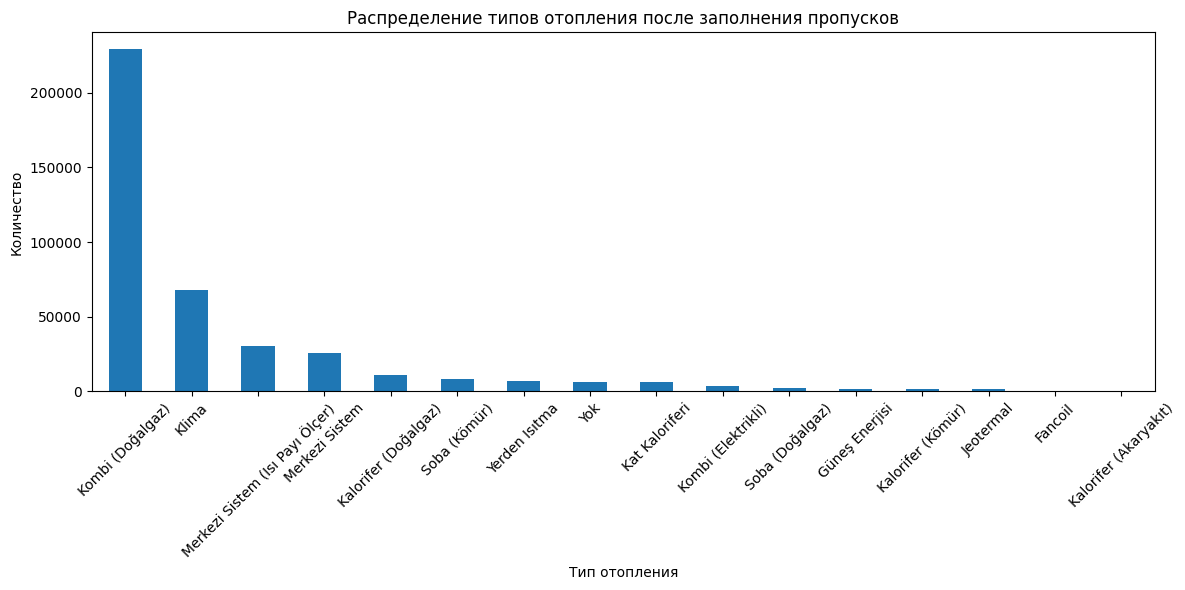

In [64]:
print("Распределение типов отопления по этажности:")

# Группируем по total_floor_count и смотрим самый частый тип отопления
heating_by_floors = df.groupby('total_floor_count')['heating_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

print("Самый частый тип отопления для каждого количества этажей:")
for floors, heating_type in heating_by_floors.items():
    print(f"{floors} этажей: {heating_type}")

# Функция для определения типа отопления по количеству этажей
def determine_heating_by_floors(total_floor_count):
    if pd.isna(total_floor_count):
        # Если этажность неизвестна, возвращаем самый распространенный тип
        return df['heating_type'].mode().iloc[0] if not df['heating_type'].mode().empty else 'Merkezi Sistem'
    
    # Для многоэтажных домов (5+ этажей) - центральное отопление
    if total_floor_count >= 5:
        return 'Merkezi Sistem'
    
    # Для средних домов (2-4 этажа) - индивидуальный котел
    elif total_floor_count >= 2:
        return 'Kombi (Doğalgaz)'
    
    # Для одноэтажных домов и особняков
    else:
        return 'Kat Kaloriferi'

# Заполняем пропущенные значения
missing_mask = df['heating_type'].isna()


df.loc[missing_mask, 'heating_type'] = df.loc[missing_mask, 'total_floor_count'].apply(determine_heating_by_floors)




# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df['heating_type'].value_counts().plot(kind='bar')
plt.title('Распределение типов отопления после заполнения пропусков')
plt.xlabel('Тип отопления')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
df.isna().sum()

id                     0
type                   0
sub_type               0
start_date             0
end_date               0
listing_type           0
tom                    0
building_age           0
total_floor_count      0
floor_no               0
room_count             0
size                   0
address                0
heating_type           0
price                715
price_currency       715
dtype: int64

In [66]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,İstanbul/Sultanbeyli/Adil,Kombi (Doğalgaz),1500.0,TRY
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Sakarya/Adapazarı/Cumhuriyet,Kombi (Doğalgaz),120000.0,TRY
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Antalya/Alanya/Saray,Kombi (Doğalgaz),48000.0,EUR
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Aydın/Kuşadası/Türkmen,Kombi (Doğalgaz),900.0,TRY


### Разделим стобик adress на 3 разных столбца

In [68]:
df_processed = df.copy()

# Функция для разбиения адреса
def split_address(address):
    if pd.isna(address) or address == 'nan':
        return np.nan, np.nan, np.nan
    
    address_str = str(address).strip()
    parts = address_str.split('/')
    
    # Обрабатываем разные случаи количества частей
    if len(parts) >= 3:
        city = parts[0].strip()
        district = parts[1].strip()
        neighborhood = parts[2].strip()
    elif len(parts) == 2:
        city = parts[0].strip()
        district = parts[1].strip()
        neighborhood = np.nan
    elif len(parts) == 1:
        city = parts[0].strip()
        district = np.nan
        neighborhood = np.nan
    else:
        city = np.nan
        district = np.nan
        neighborhood = np.nan
    
    return city, district, neighborhood

# Применяем функцию разбиения
address_components = df_processed['address'].apply(
    lambda x: pd.Series(split_address(x), index=['city', 'district', 'neighborhood'])
)

# Добавляем новые столбцы в датафрейм
df_processed = pd.concat([df_processed, address_components], axis=1)

df = df_processed
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency,city,district,neighborhood
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,İstanbul/Sultanbeyli/Adil,Kombi (Doğalgaz),1500.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Sakarya/Adapazarı/Cumhuriyet,Kombi (Doğalgaz),120000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Antalya/Alanya/Saray,Kombi (Doğalgaz),48000.0,EUR,Antalya,Alanya,Saray
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Aydın/Kuşadası/Türkmen,Kombi (Doğalgaz),900.0,TRY,Aydın,Kuşadası,Türkmen


In [69]:
df.isna().sum()

id                     0
type                   0
sub_type               0
start_date             0
end_date               0
listing_type           0
tom                    0
building_age           0
total_floor_count      0
floor_no               0
room_count             0
size                   0
address                0
heating_type           0
price                715
price_currency       715
city                   0
district               7
neighborhood          16
dtype: int64

Заполним пропуски

In [71]:
# Заполняем пропуски в адресных полях
df['district'] = df['district'].fillna('unidentified')
df['neighborhood'] = df['neighborhood'].fillna('unidentified')

In [72]:
df.isna().sum()

id                     0
type                   0
sub_type               0
start_date             0
end_date               0
listing_type           0
tom                    0
building_age           0
total_floor_count      0
floor_no               0
room_count             0
size                   0
address                0
heating_type           0
price                715
price_currency       715
city                   0
district               0
neighborhood           0
dtype: int64

### Разберемся с ценой

In [74]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency,city,district,neighborhood
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,İstanbul/Sultanbeyli/Adil,Kombi (Doğalgaz),1500.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Sakarya/Adapazarı/Cumhuriyet,Kombi (Doğalgaz),120000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Antalya/Alanya/Saray,Kombi (Doğalgaz),48000.0,EUR,Antalya,Alanya,Saray
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Aydın/Kuşadası/Türkmen,Kombi (Doğalgaz),900.0,TRY,Aydın,Kuşadası,Türkmen


Проверим на аномальные значения

In [76]:
print(f"Пропущенные значения (NaN): {df['price'].isna().sum()}")
print(f"Отрицательные значения: {(df['price'] < 0).sum()}")
print(f"Нулевые значения: {(df['price'] == 0).sum()}")

Пропущенные значения (NaN): 715
Отрицательные значения: 1
Нулевые значения: 44


Заполним NaN медианными значениями

In [78]:
median_price = df[df['price'] > 0]['price'].median()
print(f"\nМедианная цена (без нулевых значений): {median_price:.2f}")

# Заменяем нулевые значения на медиану
zero_mask = df['price'] == 0
df.loc[zero_mask, 'price'] = median_price
print(f"Заменено нулевых значений: {zero_mask.sum()}")

# Заполняем пропущенные значения (NaN) медианной ценой
df['price'] = df['price'].fillna(median_price)
print(f"Заполнено пропущенных значений: {df['price'].isna().sum()}")




Медианная цена (без нулевых значений): 199000.00
Заменено нулевых значений: 44
Заполнено пропущенных значений: 0


### Переведём все в рубли

In [80]:
exchange_rates = {
    'TRY': 2.5,    # Турецкая лира к рублю (примерный курс)
    'USD': 75.0,   # Доллар к рублю
    'EUR': 85.0,   # Евро к рублю  
    'GBP': 100.0,  # Фунт стерлингов к рублю
    'CHF': 80.0,   # Швейцарский франк к рублю
}

# Проверяем какие валюты есть в данных
print("Валюты в данных до конвертации:")
print(df['price_currency'].value_counts())

# Функция для конвертации в рубли
def convert_to_rubles(price, currency):
    if pd.isna(price) or pd.isna(currency):
        return price
    
    currency = str(currency).strip().upper()
    
    # Если уже рубли или неизвестная валюта - возвращаем как есть
    if currency == 'RUB' or currency not in exchange_rates:
        return price
    
    # Конвертируем по курсу
    return price * exchange_rates[currency]

# Конвертируем все цены в рубли
df['price_rub'] = df.apply(lambda row: convert_to_rubles(row['price'], row['price_currency']), axis=1)

# Заменяем исходный столбец price на рубли
df['price'] = df['price_rub']

# Удаляем временный столбец
df = df.drop('price_rub', axis=1)


Валюты в данных до конвертации:
price_currency
TRY    400677
EUR       922
GBP       621
USD       552
Name: count, dtype: int64


In [81]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency,city,district,neighborhood
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,8750.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,1225000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,387500.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,81250000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3625000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,İstanbul/Sultanbeyli/Adil,Kombi (Doğalgaz),3750.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Sakarya/Adapazarı/Cumhuriyet,Kombi (Doğalgaz),300000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Antalya/Alanya/Saray,Kombi (Doğalgaz),4080000.0,EUR,Antalya,Alanya,Saray
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Aydın/Kuşadası/Türkmen,Kombi (Doğalgaz),2250.0,TRY,Aydın,Kuşadası,Türkmen


In [82]:
df = df.drop('address', axis = 1)
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,Fancoil,8750.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,Fancoil,1225000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Fancoil,387500.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,Fancoil,81250000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,Fancoil,3625000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,Kombi (Doğalgaz),3750.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Kombi (Doğalgaz),300000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Kombi (Doğalgaz),4080000.0,EUR,Antalya,Alanya,Saray
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Kombi (Doğalgaz),2250.0,TRY,Aydın,Kuşadası,Türkmen


In [83]:
print(f"Пропущенные значения (NaN): {df['price'].isna().sum()}")
print(f"Отрицательные значения: {(df['price'] < 0).sum()}")
print(f"Нулевые значения: {(df['price'] == 0).sum()}")

Пропущенные значения (NaN): 0
Отрицательные значения: 1
Нулевые значения: 0


### Исправим аномальные значения

In [85]:
# Находим строку с отрицательной ценой
negative_price_row = df[df['price'] < 0]
print("Строка с отрицательной ценой:")
print(negative_price_row)

# Удаляем строку с отрицательной ценой
df_cleaned = df[df['price'] >= 0]
df = df_cleaned

Строка с отрицательной ценой:
            id   type     sub_type start_date  end_date  listing_type  tom  \
350367  350368  Konut  Müstakil Ev   01/29/19  02/27/19             2   29   

        building_age  total_floor_count  floor_no  room_count  size  \
350367             0                  2         0           4  95.0   

        heating_type  price price_currency   city   district neighborhood  
350367  Soba (Kömür) -625.0            TRY  İzmir  Kemalpaşa     Beşpınar  


In [86]:
print(f"Пропущенные значения (NaN): {df['price'].isna().sum()}")
print(f"Отрицательные значения: {(df['price'] < 0).sum()}")
print(f"Нулевые значения: {(df['price'] == 0).sum()}")

Пропущенные значения (NaN): 0
Отрицательные значения: 0
Нулевые значения: 0


In [87]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Konut,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,Fancoil,8750.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Konut,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,Fancoil,1225000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Konut,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Fancoil,387500.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Konut,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,Fancoil,81250000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Konut,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,Fancoil,3625000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Konut,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,Kombi (Doğalgaz),3750.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Konut,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Kombi (Doğalgaz),300000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Konut,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Kombi (Doğalgaz),4080000.0,EUR,Antalya,Alanya,Saray
403485,403486,Konut,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Kombi (Doğalgaz),2250.0,TRY,Aydın,Kuşadası,Türkmen


In [88]:
df.to_csv('data_for_dash_1.csv', index=False, encoding='utf-8')

## Кодируем данные для дальнейшего обучения моделей

Удалим не нужный столбец

In [91]:
df = df.drop('type', axis = 1)
df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,12/10/18,01/09/19,2,30,0,21,2,3,90.0,Fancoil,8750.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Daire,02/13/19,02/27/19,1,14,0,21,20,1,43.0,Fancoil,1225000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Daire,10/09/18,11/08/18,1,30,0,1,1,3,85.0,Fancoil,387500.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Rezidans,09/10/18,10/10/18,1,30,3,21,20,7,450.0,Fancoil,81250000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Rezidans,12/10/18,01/09/19,1,30,0,21,2,3,90.0,Fancoil,3625000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,09/18/18,02/27/19,2,162,0,4,2,4,105.0,Kombi (Doğalgaz),3750.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Daire,10/11/18,02/27/19,1,139,0,4,2,3,85.0,Kombi (Doğalgaz),300000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Daire,11/22/18,02/27/19,1,97,0,4,2,2,65.0,Kombi (Doğalgaz),4080000.0,EUR,Antalya,Alanya,Saray
403485,403486,Daire,02/21/19,02/27/19,2,6,0,4,2,3,2.0,Kombi (Doğalgaz),2250.0,TRY,Aydın,Kuşadası,Türkmen


### Подготовим поля с датами

In [93]:
def convert_date_format(date_str):
    if pd.isna(date_str):
        return date_str
    try:
        # Пробуем разные форматы на случай разнообразия в данных
        date_obj = pd.to_datetime(date_str, format='%m/%d/%y', errors='coerce')
        if pd.isna(date_obj):
            date_obj = pd.to_datetime(date_str, format='%d/%m/%y', errors='coerce')
        
        # Преобразуем в нужный формат
        if not pd.isna(date_obj):
            return date_obj.strftime('%d-%m-%Y')
        else:
            return date_str  # Если не удалось распарсить, оставляем как есть
    except:
        return date_str

df['start_date'] = df['start_date'].apply(convert_date_format)
df['end_date'] = df['end_date'].apply(convert_date_format)

In [94]:
df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,Fancoil,8750.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Daire,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,Fancoil,1225000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Daire,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,Fancoil,387500.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Rezidans,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,Fancoil,81250000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Rezidans,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,Fancoil,3625000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,Kombi (Doğalgaz),3750.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Daire,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,Kombi (Doğalgaz),300000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Daire,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,Kombi (Doğalgaz),4080000.0,EUR,Antalya,Alanya,Saray
403485,403486,Daire,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,Kombi (Doğalgaz),2250.0,TRY,Aydın,Kuşadası,Türkmen


### Подготовим столбец heating_type

In [96]:
heating_mapping = {
    'Fancoil': 1,
    'Güneş Enerjisi': 2,
    'Jeotermal': 3,
    'Kalorifer (Akaryakıt)': 4,
    'Kalorifer (Doğalgaz)': 5,
    'Kalorifer (Kömür)': 6,
    'Kat Kaloriferi': 7,
    'Klima': 8,
    'Kombi (Doğalgaz)': 9,
    'Kombi (Elektrikli)': 10,
    'Merkezi Sistem': 11,
    'Merkezi Sistem (Isı Payı Ölçer)': 12,
    'Soba (Doğalgaz)': 13,
    'Soba (Kömür)': 14,
    'Yerden Isıtma': 15,
    'Yok': 16
}

### Заменим все на код

In [98]:
df['heating_type'] = df['heating_type'].map(heating_mapping)

# Проверка уникальных значений после преобразования
print(df['heating_type'].unique())

[ 1 16  5  6 10  8  9 12 11 14 15 13  2  4  3  7]


In [99]:
df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,1,8750.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Daire,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,1,1225000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Daire,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,1,387500.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Rezidans,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,1,81250000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Rezidans,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,1,3625000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,9,3750.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Daire,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,9,300000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Daire,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,9,4080000.0,EUR,Antalya,Alanya,Saray
403485,403486,Daire,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,9,2250.0,TRY,Aydın,Kuşadası,Türkmen


In [100]:
df.isna().sum()

id                     0
sub_type               0
start_date             0
end_date               0
listing_type           0
tom                    0
building_age           0
total_floor_count      0
floor_no               0
room_count             0
size                   0
heating_type           0
price                  0
price_currency       715
city                   0
district               0
neighborhood           0
dtype: int64

### Зполнии пропуски в столбце price_currency медианными значениями

In [102]:
currency_mapping = {}
unique_currencies = df['price_currency'].dropna().unique()

unique_currencies_sorted = sorted(unique_currencies)
currency_to_code = {currency: code for code, currency in enumerate(unique_currencies_sorted)}
code_to_currency = {code: currency for currency, code in currency_to_code.items()}

# Создадим временный числовой столбец
df['currency_code'] = df['price_currency'].map(currency_to_code)

median_code = df['currency_code'].median()

median_code_rounded = round(median_code)

# Получим валюту, соответствующую округленному медианному коду
median_currency = code_to_currency[median_code_rounded]

# Заполним пропуски в price_currency этой валютой
df['price_currency'].fillna(median_currency, inplace=True)


df.drop('currency_code', axis=1, inplace=True)

print(median_currency)

TRY


C:\Users\Alfamod\AppData\Local\Temp\ipykernel_5612\212323886.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_currency'].fillna(median_currency, inplace=True)


In [103]:
df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,1,8750.0,TRY,İstanbul,Kartal,Kordonboyu
1,2,Daire,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,1,1225000.0,TRY,İstanbul,Kartal,Kordonboyu
2,3,Daire,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,1,387500.0,TRY,Tekirdağ,Çorlu,Reşadiye
3,4,Rezidans,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,1,81250000.0,TRY,İstanbul,Beşiktaş,Levent
4,5,Rezidans,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,1,3625000.0,TRY,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,9,3750.0,TRY,İstanbul,Sultanbeyli,Adil
403483,403484,Daire,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,9,300000.0,TRY,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Daire,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,9,4080000.0,EUR,Antalya,Alanya,Saray
403485,403486,Daire,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,9,2250.0,TRY,Aydın,Kuşadası,Türkmen


In [104]:
df.isna().sum()

id                   0
sub_type             0
start_date           0
end_date             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
floor_no             0
room_count           0
size                 0
heating_type         0
price                0
price_currency       0
city                 0
district             0
neighborhood         0
dtype: int64

### Заменим на кодированные данные

In [106]:
unique_currencies = df['price_currency'].unique()
print(unique_currencies)


['TRY' 'GBP' 'EUR' 'USD']


In [107]:
currency_mapping = {
    'TRY': 1,
    'GBP': 2,
    'EUR': 3,
    'USD': 4
}

In [108]:
df['price_currency'] = df['price_currency'].map(currency_mapping)
df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,1,8750.0,1,İstanbul,Kartal,Kordonboyu
1,2,Daire,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,1,1225000.0,1,İstanbul,Kartal,Kordonboyu
2,3,Daire,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,1,387500.0,1,Tekirdağ,Çorlu,Reşadiye
3,4,Rezidans,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,1,81250000.0,1,İstanbul,Beşiktaş,Levent
4,5,Rezidans,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,1,3625000.0,1,İstanbul,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,9,3750.0,1,İstanbul,Sultanbeyli,Adil
403483,403484,Daire,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,9,300000.0,1,Sakarya,Adapazarı,Cumhuriyet
403484,403485,Daire,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,9,4080000.0,3,Antalya,Alanya,Saray
403485,403486,Daire,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,9,2250.0,1,Aydın,Kuşadası,Türkmen


In [109]:
df.isna().sum()

id                   0
sub_type             0
start_date           0
end_date             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
floor_no             0
room_count           0
size                 0
heating_type         0
price                0
price_currency       0
city                 0
district             0
neighborhood         0
dtype: int64

### Поменяем запись адреса

Заменим названия городов на кодировку

In [112]:
un = df['city'].unique() 
print(un)

['İstanbul' 'Tekirdağ' 'İzmir' 'Çanakkale' 'Muğla' 'Aydın' 'Mersin'
 'Manisa' 'Ankara' 'Balıkesir' 'KKTC' 'Antalya' 'Kocaeli' 'Adana'
 'Gaziantep' 'Eskişehir' 'Sakarya' 'Samsun' 'Bursa' 'Adıyaman' 'Nevşehir'
 'Sinop' 'Kayseri' 'Osmaniye' 'Erzincan' 'Kırklareli' 'Yalova' 'Giresun'
 'Trabzon' 'Tokat' 'Malatya' 'Bolu' 'Afyonkarahisar' 'Çankırı' 'Ordu'
 'Burdur' 'Elazığ' 'Edirne' 'Denizli' 'Kastamonu' 'Isparta' 'Bilecik'
 'Düzce' 'Mardin' 'Hatay' 'Kahramanmaraş' 'Karaman' 'Şanlıurfa' 'Niğde'
 'Rize' 'Konya' 'Aksaray' 'Yozgat' 'Van' 'Zonguldak' 'Sivas' 'Uşak'
 'Kütahya' 'Erzurum' 'Diyarbakır' 'Batman' 'Kırşehir' 'Kilis' 'Kars'
 'Amasya' 'Çorum' 'Kırıkkale' 'Karabük' 'Gümüşhane' 'Bingöl' 'Artvin'
 'Ardahan' 'Ağrı' 'Bartın' 'Hakkari' 'Bitlis' 'Bayburt' 'Şırnak' 'Siirt'
 'Muş' 'Iğdır' 'Tunceli']


In [113]:
cities = ['İstanbul', 'Tekirdağ', 'İzmir', 'Çanakkale', 'Muğla', 'Aydın', 'Mersin',
          'Manisa', 'Ankara', 'Balıkesir', 'KKTC', 'Antalya', 'Kocaeli', 'Adana',
          'Gaziantep', 'Eskişehir', 'Sakarya', 'Samsun', 'Bursa', 'Adıyaman', 'Nevşehir',
          'Sinop', 'Kayseri', 'Osmaniye', 'Erzincan', 'Kırklareli', 'Yalova', 'Giresun',
          'Trabzon', 'Tokat', 'Malatya', 'Bolu', 'Afyonkarahisar', 'Çankırı', 'Ordu',
          'Burdur', 'Elazığ', 'Edirne', 'Denizli', 'Kastamonu', 'Isparta', 'Bilecik',
          'Düzce', 'Mardin', 'Hatay', 'Kahramanmaraş', 'Karaman', 'Şanlıurfa', 'Niğde',
          'Rize', 'Konya', 'Aksaray', 'Yozgat', 'Van', 'Zonguldak', 'Sivas', 'Uşak',
          'Kütahya', 'Erzurum', 'Diyarbakır', 'Batman', 'Kırşehir', 'Kilis', 'Kars',
          'Amasya', 'Çorum', 'Kırıkkale', 'Karabük', 'Gümüşhane', 'Bingöl', 'Artvin',
          'Ardahan', 'Ağrı', 'Bartın', 'Hakkari', 'Bitlis', 'Bayburt', 'Şırnak', 'Siirt',
          'Muş', 'Iğdır', 'Tunceli']

city_mapping = {city: idx+1 for idx, city in enumerate(cities)}
df['city'] = df['city'].map(city_mapping)

df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,1,8750.0,1,1,Kartal,Kordonboyu
1,2,Daire,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,1,1225000.0,1,1,Kartal,Kordonboyu
2,3,Daire,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,1,387500.0,1,2,Çorlu,Reşadiye
3,4,Rezidans,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,1,81250000.0,1,1,Beşiktaş,Levent
4,5,Rezidans,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,1,3625000.0,1,1,Kartal,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,9,3750.0,1,1,Sultanbeyli,Adil
403483,403484,Daire,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,9,300000.0,1,17,Adapazarı,Cumhuriyet
403484,403485,Daire,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,9,4080000.0,3,12,Alanya,Saray
403485,403486,Daire,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,9,2250.0,1,6,Kuşadası,Türkmen


Подготовим округи

In [115]:
un = df['district'].unique() # Уникальные значения
print(un)

['Kartal' 'Çorlu' 'Beşiktaş' 'Maltepe' 'Urla' 'Ayvacık' 'Fatih' 'Bodrum'
 'Bayraklı' 'Efeler' 'Yenişehir' 'Turgutlu' 'Şişli' 'Çankaya' 'Bağcılar'
 'Edremit' 'Merkez' 'Avcılar' 'Gömeç' 'Karaburun' 'Bornova' 'Nazilli'
 'Beykoz' 'Güzelbahçe' 'Menemen' 'Aliağa' 'Sarıyer' 'Seferihisar'
 'Burhaniye' 'Ayvalık' 'Gazimağusa' 'Bakırköy' 'Aksu' 'Çeşme' 'Kağıthane'
 'İzmit' 'Elmadağ' 'Sultangazi' 'Şarköy' 'Erdemli' 'Dikili' 'Kadıköy'
 'Karesi' 'Küçükçekmece' 'Güngören' 'Datça' 'Kepez' 'Yüreğir' 'Döşemealtı'
 'Ula' 'Altındağ' 'Sancaktepe' 'Marmaris' 'Büyükçekmece' 'Toroslar'
 'Muratpaşa' 'Zeytinburnu' 'Şahinbey' 'Pozantı' 'Ataşehir' 'Odunpazarı'
 'Köyceğiz' 'Gölcük' 'Kuşadası' 'Esenler' 'Karşıyaka' 'Adapazarı'
 'Etimesgut' 'Pendik' 'Beylikdüzü' 'Ortaca' 'Başakşehir' 'Serik'
 'Çekmeköy' 'Atakum' 'Süleymanpaşa' 'İlkadım' 'Buca' 'Silivri' 'Fethiye'
 'Gebze' 'Mudanya' 'Didim' 'Foça' 'Adalar' 'Seyhan' 'Gemlik' 'Çukurova'
 'Alanya' 'Sarıçam' 'Çerkezköy' 'Kocasinan' 'Mezitli' 'Silifke'
 'Büyükorhan' 'Biga

In [116]:
# Получаем уникальные значения районов
districts = ['Kartal', 'Çorlu', 'Beşiktaş', 'Maltepe', 'Urla', 'Ayvacık', 'Fatih', 'Bodrum',
             'Bayraklı', 'Efeler', 'Yenişehir', 'Turgutlu', 'Şişli', 'Çankaya', 'Bağcılar',
             'Edremit', 'Merkez', 'Avcılar', 'Gömeç', 'Karaburun', 'Bornova', 'Nazilli',
             'Beykoz', 'Güzelbahçe', 'Menemen', 'Aliağa', 'Sarıyer', 'Seferihisar',
             'Burhaniye', 'Ayvalık', 'Gazimağusa', 'Bakırköy', 'Aksu', 'Çeşme', 'Kağıthane',
             'İzmit', 'Elmadağ', 'Sultangazi', 'Şarköy', 'Erdemli', 'Dikili', 'Kadıköy',
             'Karesi', 'Küçükçekmece', 'Güngören', 'Datça', 'Kepez', 'Yüreğir', 'Döşemealtı',
             'Ula', 'Altındağ', 'Sancaktepe', 'Marmaris', 'Büyükçekmece', 'Toroslar',
             'Muratpaşa', 'Zeytinburnu', 'Şahinbey', 'Pozantı', 'Ataşehir', 'Odunpazarı',
             'Köyceğiz', 'Gölcük', 'Kuşadası', 'Esenler', 'Karşıyaka', 'Adapazarı',
             'Etimesgut', 'Pendik', 'Beylikdüzü', 'Ortaca', 'Başakşehir', 'Serik',
             'Çekmeköy', 'Atakum', 'Süleymanpaşa', 'İlkadım', 'Buca', 'Silivri', 'Fethiye',
             'Gebze', 'Mudanya', 'Didim', 'Foça', 'Adalar', 'Seyhan', 'Gemlik', 'Çukurova',
             'Alanya', 'Sarıçam', 'Çerkezköy', 'Kocasinan', 'Mezitli', 'Silifke',
             'Büyükorhan', 'Biga', 'Bala', 'Osmangazi', 'Refahiye', 'Karabağlar', 'Tuzla',
             'Lüleburgaz', 'Yunusemre', 'Nilüfer', 'Lefkoşa', 'Çınarcık', 'Pursaklar',
             'Esenyurt', 'Menderes', 'Torbalı', 'Konak', 'Kınık', 'Şehitkamil',
             'Bahçelievler', 'Demirköy', 'Ortahisar', 'Orhangazi', 'Çatalca', 'Karasu',
             'Üsküdar', 'Menteşe', 'Kartepe', 'Derince', 'Sapanca', 'Konyaaltı', 'Bayındır',
             'Marmaraereğlisi', 'Akçadağ', 'Kandıra', 'Yıldırım', 'Şehzadeler', 'Mengen',
             'Akdeniz', 'Söke', 'Kocaali', 'Bergama', 'Gaziemir', 'Tekkeköy', 'Serdivan',
             'Çerkeş', 'Bandırma', 'Gülyalı', 'Bucak', 'Akyazı', 'Erdek', 'Keşan', 'Beyoğlu',
             'Çiftlikköy', 'Çiğli', 'Karacabey', 'Saray', 'Milas', 'Melikgazi', 'Pamukkale',
             'Balçova', 'Akhisar', 'Sivrihisar', 'Kemalpaşa', 'Korkuteli', 'Yomra', 'Ceyhan',
             'Darıca', 'Gelibolu', 'Bozüyük', 'Yenipazar', 'İskele', 'Ümraniye', 'Ezine',
             'Tire', 'Akçakoca', 'İnebolu', 'Bayramiç', 'Eceabat', 'Dalaman', 'Artuklu',
             'Selçuk', 'Tarsus', 'Tepebaşı', 'İskenderun', 'Elbistan', 'İncirliova',
             'Gaziosmanpaşa', 'Eğirdir', 'Dulkadiroğlu', 'Seydikemer', 'Erenler',
             'Bayrampaşa', 'Narlıdere', 'Battalgazi', 'Karaköprü', 'Gölyaka', 'Yenice',
             'Manavgat', '19 Mayıs', 'İznik', 'Keçiören', 'Onikişubat', 'Dilovası',
             'Yeşilyurt', 'Havran', 'Merkezefendi', 'Salihli', 'Oğuzeli', 'Sincan',
             'Selçuklu', 'Çarşamba', 'Akçaabat', 'Armutlu', 'Enez', 'Ahmetli', 'Saruhanlı',
             'Kemer', 'Şile', 'Haliliye', 'Altıeylül', 'Gazipaşa', 'Beypazarı', 'Girne',
             'Gülnar', 'Canik', 'Ardeşen', 'Gürsu', 'Aladağ', 'Çamlıyayla', 'Bor',
             'Karamürsel', 'Arnavutköy', 'Mamak', 'Başiskele', 'Sorgun', 'Çayırova',
             'İpsala', 'Kapaklı', 'Karatay', 'Meram', 'Ödemiş', 'Yenimahalle', 'Kızıltepe',
             'Defne', 'Altınova', 'Çubuk', 'İncesu', 'Palandöken', 'Eyüpsultan', 'Hendek',
             'Körfez', 'Sultanbeyli', 'Kozlu', 'Arifiye', 'Yakutiye', 'Talas', 'Gölbaşı',
             'Kayapınar', 'Kadirli', 'Oltu', 'Of', 'Gümüşova', 'Mustafakemalpaşa', 'Ergene',
             'Ereğli', 'Fatsa', 'Polatlı', 'Muratlı', 'Altınordu', 'İnegöl', 'Kaynaşlı',
             'Antakya', 'Merzifon', 'Pamukova', 'Aziziye', 'Lapseki', 'Akşehir', 'Kestel',
             'Güney', 'Vakfıkebir', 'Yahşihan', 'Babaeski', 'Kahta', 'Atabey', 'Araklı',
             'Cumayeri', 'Yıldızeli', 'İpekyolu', 'Ferizli', 'Termal', 'Ermenek',
             'Karapürçek', 'Tuşba', 'Ürgüp', 'Bafra', 'Gönen', 'Alaşehir', 'Cide', 'Bulancak',
             'Sürmene', 'İhsaniye', 'Uzunköprü', 'Kozan', 'Ünye', 'Eşme', 'Şuhut', 'Develi',
             'Kavak', 'Perşembe', 'Ağlasun', 'Germencik', 'Görele', 'Arsin', 'Tirebolu',
             'Taşköprü', 'Kırkağaç', 'Beşikdüzü', 'Devrek', 'Pazar', 'Patnos', 'Çamardı',
             'Malkara', 'Eyyübiye', 'Geyve', 'Kaman', 'Yalvaç', 'Güce', 'Arhavi', 'Susurluk',
             'Havsa', 'Çayeli', 'Arsuz', 'Dörtyol', 'Kırıkhan', 'Belen', 'Ayaş', 'Çameli',
             'Kaş', 'unidentified', 'Finike', 'Bozcaada', 'Bahçe', 'Kumluca', 'Güzelyurt',
             'Çine', 'Anamur', 'Yumurtalık', 'Bozyazı', 'Yatağan', 'Kale', 'Beyağaç',
             'Marmara', 'Kuyucak', 'Gökçeada', 'İmamoğlu', 'Sultanhisar', 'Karataş',
             'Ulukışla', 'Beşiri', 'Sarıkaya', 'Çelikhan', 'Beylikova', 'Hacılar', 'Akyurt',
             'Kahramankazan', 'Çukurca', 'Bahşili', 'Çan', 'Acıpayam', 'Zile', 'Toprakkale',
             'Emirdağ', 'Bağlar', 'Nizip', 'Yeşilhisar', 'Söğütlü', 'Kelkit', 'Tatvan',
             'Erzin', 'Ilgın', 'Sivrice', 'Amasra', 'Yerköy', 'Cizre', 'Gerede', 'Çilimli',
             'Kızılcahamam', 'Emet', 'Sandıklı', 'Günyüzü', 'Devrekani', 'Osmancık',
             'Osmaneli', 'Avanos', 'Alaplı', 'Seyitgazi', 'İnönü', 'Kaynarca', 'Taraklı',
             'Terme', 'Şiran', 'Eleşkirt', 'Safranbolu', 'Abana', 'Havza', 'Besni',
             'Bolvadin', 'Akdağmadeni', 'Midyat', 'Alaca', 'Hopa', 'Buldan', 'Doğanşehir',
             'Sarayköy', 'Daday', 'Bigadiç', 'Bünyan', 'Gülşehir', 'İslahiye', 'Viranşehir',
             'Türkoğlu', 'Göynük', 'Kepsut', 'Kóşk', 'Sarıkamış', 'Demre', 'Akçakent',
             'Almus', 'Boğazlıyan', 'Kozaklı', 'Çaykara', 'Pınarhisar', 'Beyşehir',
             'Pazaryeri', 'Çaycuma', 'Maçka', 'Orhaneli', 'Vize', 'Şefaatli', 'Dazkırı',
             'Soma', 'Lalapaşa', 'Erfelek', 'Kurucaşile', 'Musabeyli', 'İvrindi', 'Bozkurt',
             'Karaisalı', 'Turhal', 'Kabadüz', 'Kula', 'Üzümlü', 'Elmalı', 'Mahmudiye',
             'Çandır', 'Mihalgazi', 'Tortum', 'Oğuzlar', 'Çarşıbaşı', 'Mudurnu', 'Manyas',
             'Azdavay', 'Korgun', 'Küre', 'Kalecik', 'Kumru', 'Keles', 'Kargı', 'Araç',
             'Sultanhanı', 'Pasinler', 'Hayrabolu', 'Uzundere', 'Piraziz', 'Güneysınır',
             'Buharkent', 'Honaz', 'Hafik', 'Pazarcık', 'Şereflikoçhisar', 'Hanak',
             'Hasanbeyli', 'Kağızman', 'Kozluk', 'Fındıklı', 'Güdül', 'Sarıcakaya',
             'Domaniç', 'Akseki', 'Göksun', 'Alaçam', 'Ergani', 'Karacasu', 'Sungurlu',
             'Tillo', 'Serinhisar', 'Tomarza', 'Afşin', 'Borçka', 'Hilvan', 'Babadağ',
             'Yığılca', 'Sarıoğlan', 'Çanakçı', 'Yakakent', 'Koçarlı', 'Kemah', 'Torul',
             'Suluova', 'Bozkır', 'Demirci', 'Çeltik', 'Seydişehir', 'Dursunbey', 'Sumbas',
             'Çardak', 'Tufanbeyli', 'Hamur', 'Horasan', 'Dicle', 'Boztepe', 'Tavas', 'Çumra',
             'Çavdır', 'Kavaklıdere', 'Yazıhan', 'Çağlayancerit', 'Bekilli', 'Gürgentepe',
             'Harmancık', 'Akören', 'Aydıncık']


district_mapping = {district: idx+1 for idx, district in enumerate(districts)}

# Применяем преобразование к столбцу district
df['district'] = df['district'].map(district_mapping)

# Проверяем наличие пропусков
if df['district'].isnull().sum() > 0:
    df['district'] = df['district'].fillna(0).astype(int)
else:
    df['district'] = df['district'].astype(int)
df


,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,1,8750.0,1,1,1,Kordonboyu
1,2,Daire,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,1,1225000.0,1,1,1,Kordonboyu
2,3,Daire,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,1,387500.0,1,2,2,Reşadiye
3,4,Rezidans,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,1,81250000.0,1,1,3,Levent
4,5,Rezidans,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,1,3625000.0,1,1,1,Kordonboyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,9,3750.0,1,1,247,Adil
403483,403484,Daire,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,9,300000.0,1,17,67,Cumhuriyet
403484,403485,Daire,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,9,4080000.0,3,12,89,Saray
403485,403486,Daire,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,9,2250.0,1,6,64,Türkmen


Подготовим районы

In [118]:
neighborhoods = df['neighborhood'].unique().tolist()

neighborhood_mapping = {neighborhood: idx+1 for idx, neighborhood in enumerate(neighborhoods)}

df['neighborhood'] = df['neighborhood'].map(neighborhood_mapping)

df['neighborhood'] = df['neighborhood'].astype('int64')

df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,Rezidans,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,1,8750.0,1,1,1,1
1,2,Daire,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,1,1225000.0,1,1,1,1
2,3,Daire,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,1,387500.0,1,2,2,2
3,4,Rezidans,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,1,81250000.0,1,1,3,3
4,5,Rezidans,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,1,3625000.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,Daire,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,9,3750.0,1,1,247,1140
403483,403484,Daire,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,9,300000.0,1,17,67,64
403484,403485,Daire,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,9,4080000.0,3,12,89,1473
403485,403486,Daire,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,9,2250.0,1,6,64,369


### Поменяем запись sub_type

In [120]:
unique_sub_types = df['sub_type'].unique()
print("Уникальные значения sub_type:")
print(unique_sub_types)

# Создаем словарь для кодирования
sub_type_mapping = {sub_type: idx+1 for idx, sub_type in enumerate(unique_sub_types)}
print("\nСловарь для кодирования:")
print(sub_type_mapping)

# Применяем кодирование к столбцу sub_type
df['sub_type'] = df['sub_type'].map(sub_type_mapping)

# Проверяем результат
print("\nПервые 10 строк после кодирования:")
print(df[['id', 'sub_type']].head(10))

# Проверяем уникальные значения после кодирования
print("\nУникальные значения после кодирования:")
print(df['sub_type'].unique())

# Сохраняем mapping для будущего использования
print(f"\nСохраненный словарь кодирования:")
for sub_type, code in sub_type_mapping.items():
    print(f"{sub_type} -> {code}")

Уникальные значения sub_type:
['Rezidans' 'Daire' 'Villa' 'Müstakil Ev' 'Kooperatif' 'Yazlık'
 'Komple Bina' 'Prefabrik Ev' 'Köşk / Konak / Yalı' 'Çiftlik Evi'
 'Yalı Dairesi' 'Loft']

Словарь для кодирования:
{'Rezidans': 1, 'Daire': 2, 'Villa': 3, 'Müstakil Ev': 4, 'Kooperatif': 5, 'Yazlık': 6, 'Komple Bina': 7, 'Prefabrik Ev': 8, 'Köşk / Konak / Yalı': 9, 'Çiftlik Evi': 10, 'Yalı Dairesi': 11, 'Loft': 12}

Первые 10 строк после кодирования:
   id  sub_type
0   1         1
1   2         2
2   3         2
3   4         1
4   5         1
5   6         1
6   7         2
7   8         3
8   9         2
9  10         2

Уникальные значения после кодирования:
[ 1  2  3  4  5  6  7  8  9 10 11 12]

Сохраненный словарь кодирования:
Rezidans -> 1
Daire -> 2
Villa -> 3
Müstakil Ev -> 4
Kooperatif -> 5
Yazlık -> 6
Komple Bina -> 7
Prefabrik Ev -> 8
Köşk / Konak / Yalı -> 9
Çiftlik Evi -> 10
Yalı Dairesi -> 11
Loft -> 12


In [121]:
df

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,1,10-12-2018,09-01-2019,2,30,0,21,2,3,90.0,1,8750.0,1,1,1,1
1,2,2,13-02-2019,27-02-2019,1,14,0,21,20,1,43.0,1,1225000.0,1,1,1,1
2,3,2,09-10-2018,08-11-2018,1,30,0,1,1,3,85.0,1,387500.0,1,2,2,2
3,4,1,10-09-2018,10-10-2018,1,30,3,21,20,7,450.0,1,81250000.0,1,1,3,3
4,5,1,10-12-2018,09-01-2019,1,30,0,21,2,3,90.0,1,3625000.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403482,403483,2,18-09-2018,27-02-2019,2,162,0,4,2,4,105.0,9,3750.0,1,1,247,1140
403483,403484,2,11-10-2018,27-02-2019,1,139,0,4,2,3,85.0,9,300000.0,1,17,67,64
403484,403485,2,22-11-2018,27-02-2019,1,97,0,4,2,2,65.0,9,4080000.0,3,12,89,1473
403485,403486,2,21-02-2019,27-02-2019,2,6,0,4,2,3,2.0,9,2250.0,1,6,64,369


### Проверим на аномальные значения

In [123]:
import pandas as pd
import numpy as np
from datetime import datetime

print("=" * 60)
print("ПОЛНАЯ ПРОВЕРКА ДАТАСЕТА НА АНОМАЛИИ")
print("=" * 60)

# 1. Проверка на пустые значения
print("\n1. ПРОВЕРКА НА ПУСТЫЕ ЗНАЧЕНИЯ:")
print("-" * 40)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Пустые значения': missing_values,
    'Процент': missing_percentage
})
print(missing_info[missing_info['Пустые значения'] > 0])

if missing_info['Пустые значения'].sum() == 0:
    print("✓ Пустых значений нет")

# 2. Проверка на дубликаты
print("\n2. ПРОВЕРКА НА ДУБЛИКАТЫ:")
print("-" * 40)
duplicates = df.duplicated().sum()
print(f"Полных дубликатов строк: {duplicates}")

# 3. Проверка числовых столбцов на аномалии
print("\n3. ПРОВЕРКА ЧИСЛОВЫХ СТОЛБЦОВ:")
print("-" * 40)

numeric_columns = ['id', 'listing_type', 'tom', 'building_age', 
                  'total_floor_count', 'floor_no', 'room_count', 'size', 
                  'heating_type', 'price', 'price_currency', 'city', 'district', 'neighborhood']

for col in numeric_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Min: {df[col].min()}, Max: {df[col].max()}")
        print(f"  Среднее: {df[col].mean():.2f}, Медиана: {df[col].median():.2f}")
        
        # Проверка на отрицательные значения
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"  ⚠️  Отрицательных значений: {negative_count}")
        
        # Проверка на нулевые значения (где они не ожидаются)
        zero_count = (df[col] == 0).sum()
        if zero_count > 0 and col not in ['building_age', 'floor_no']:  # Для некоторых столбцов 0 может быть валидным
            print(f"  ⚠️  Нулевых значений: {zero_count}")
        
        # Проверка на выбросы (значения beyond 3 стандартных отклонений)
        if df[col].dtype in [np.int64, np.float64]:
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            outliers = (z_scores > 3).sum()
            if outliers > 0:
                print(f"  ⚠️  Выбросов (>3σ): {outliers}")

# 4. Проверка конкретных столбцов на логические несоответствия
print("\n4. ЛОГИЧЕСКАЯ ПРОВЕРКА:")
print("-" * 40)

# Проверка этажей
invalid_floors = df[df['floor_no'] > df['total_floor_count']]
if len(invalid_floors) > 0:
    print(f"⚠️  Некорректные этажи (этаж > всего этажей): {len(invalid_floors)} записей")

# Проверка возраста здания
if 'building_age' in df.columns:
    unreasonable_age = df[df['building_age'] > 200]  # Здания старше 200 лет
    if len(unreasonable_age) > 0:
        print(f"⚠️  Сомнительный возраст здания (>200 лет): {len(unreasonable_age)} записей")

# Проверка площади
if 'size' in df.columns:
    too_small = df[df['size'] < 10]  # Очень маленькая площадь
    too_large = df[df['size'] > 1000]  # Очень большая площадь
    if len(too_small) > 0:
        print(f"⚠️  Очень маленькая площадь (<10 m²): {len(too_small)} записей")
    if len(too_large) > 0:
        print(f"⚠️  Очень большая площадь (>1000 m²): {len(too_large)} записей")

# Проверка цены
if 'price' in df.columns:
    zero_price = df[df['price'] == 0]
    negative_price = df[df['price'] < 0]
    extremely_high = df[df['price'] > df['price'].quantile(0.999)]  # Топ 0.1% самых дорогих
    
    if len(zero_price) > 0:
        print(f"⚠️  Нулевая цена: {len(zero_price)} записей")
    if len(negative_price) > 0:
        print(f"⚠️  Отрицательная цена: {len(negative_price)} записей")
    if len(extremely_high) > 0:
        print(f"⚠️  Экстремально высокие цены (>99.9%): {len(extremely_high)} записей")

# 5. Проверка дат
print("\n5. ПРОВЕРКА ДАТ:")
print("-" * 40)

date_columns = ['start_date', 'end_date']
for col in date_columns:
    if col in df.columns:
        print(f"\n{col}:")
        # Проверка на корректность формата дат
        try:
            # Пробуем преобразовать в datetime
            dates = pd.to_datetime(df[col], errors='coerce')
            invalid_dates = dates.isnull().sum()
            if invalid_dates > 0:
                print(f"  ⚠️  Некорректных дат: {invalid_dates}")
            
            # Проверка на разумные временные рамки
            if col == 'start_date':
                very_old = dates < pd.to_datetime('2000-01-01')
                future_dates = dates > pd.to_datetime('2024-12-31')
                if very_old.sum() > 0:
                    print(f"  ⚠️  Очень старые даты (<2000): {very_old.sum()}")
                if future_dates.sum() > 0:
                    print(f"  ⚠️  Даты из будущего (>2024): {future_dates.sum()}")
                    
        except Exception as e:
            print(f"  ❌ Ошибка при обработке дат: {e}")

# 6. Проверка категориальных переменных
print("\n6. ПРОВЕРКА КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:")
print("-" * 40)

categorical_columns = ['sub_type', 'heating_type', 'price_currency', 'city', 'district', 'neighborhood']
for col in categorical_columns:
    if col in df.columns:
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values} уникальных значений")
        
        # Проверка на неожиданные значения
        if col == 'heating_type':
            invalid_heating = df[~df[col].isin(range(1, 17))]  # Должны быть от 1 до 16
            if len(invalid_heating) > 0:
                print(f"  ⚠️  Неожиданные значения отопления: {len(invalid_heating)}")

# 7. Проверка времени на рынке (TOM)
print("\n7. ПРОВЕРКА ВРЕМЕНИ НА РЫНКЕ (TOM):")
print("-" * 40)

if 'tom' in df.columns:
    print(f"TOM: от {df['tom'].min()} до {df['tom'].max()} дней")
    negative_tom = df[df['tom'] < 0]
    extremely_long = df[df['tom'] > 365 * 2]  # Более 2 лет на рынке
    
    if len(negative_tom) > 0:
        print(f"⚠️  Отрицательное время на рынке: {len(negative_tom)}")
    if len(extremely_long) > 0:
        print(f"⚠️  Очень долгое время на рынке (>2 лет): {len(extremely_long)}")

# 8. Сводка по проблемам
print("\n" + "=" * 60)
print("СВОДКА ПО ПРОБЛЕМАМ:")
print("=" * 60)

problems_found = False

if missing_info['Пустые значения'].sum() > 0:
    print("❌ Есть пустые значения")
    problems_found = True

if duplicates > 0:
    print("❌ Есть дубликаты")
    problems_found = True

# Проверяем все выявленные проблемы
check_columns = [
    ('negative_floors', 'floor_no < 0', (df['floor_no'] < 0).sum() > 0),
    ('invalid_floors', 'floor_no > total_floor_count', len(invalid_floors) > 0),
    ('unreasonable_age', 'building_age > 200', 'building_age' in df.columns and len(unreasonable_age) > 0),
    ('too_small_size', 'size < 10', 'size' in df.columns and len(too_small) > 0),
    ('too_large_size', 'size > 1000', 'size' in df.columns and len(too_large) > 0),
    ('zero_price', 'price = 0', 'price' in df.columns and len(zero_price) > 0),
    ('negative_price', 'price < 0', 'price' in df.columns and len(negative_price) > 0),
    ('negative_tom', 'tom < 0', 'tom' in df.columns and len(negative_tom) > 0),
]

for problem_name, description, condition in check_columns:
    if condition:
        print(f"❌ {description}")
        problems_found = True

if not problems_found:
    print("✓ Серьезных проблем не обнаружено")

print("\n" + "=" * 60)
print("РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ ДАННЫХ:")
print("=" * 60)

# Рекомендации по обработке
if missing_info['Пустые значения'].sum() > 0:
    print("1. Заполнить пустые значения (медианой/модой или удалить строки)")
    
if duplicates > 0:
    print("2. Удалить дубликаты")

if 'price' in df.columns:
    if len(zero_price) > 0 or len(negative_price) > 0:
        print("3. Обработать некорректные цены (удалить или заменить)")

if len(invalid_floors) > 0:
    print("4. Исправить некорректные данные по этажам")

print("5. Рассмотреть обработку выбросов для числовых переменных")
print("6. Проверить и исправить некорректные даты")

print(f"\nОбщее количество записей: {len(df)}")
print(f"Количество признаков: {len(df.columns)}")

ПОЛНАЯ ПРОВЕРКА ДАТАСЕТА НА АНОМАЛИИ

1. ПРОВЕРКА НА ПУСТЫЕ ЗНАЧЕНИЯ:
----------------------------------------
Empty DataFrame
Columns: [Пустые значения, Процент]
Index: []
✓ Пустых значений нет

2. ПРОВЕРКА НА ДУБЛИКАТЫ:
----------------------------------------
Полных дубликатов строк: 0

3. ПРОВЕРКА ЧИСЛОВЫХ СТОЛБЦОВ:
----------------------------------------

id:
  Min: 1, Max: 403487
  Среднее: 201743.63, Медиана: 201743.50

listing_type:
  Min: 1, Max: 3
  Среднее: 1.29, Медиана: 1.00
  ⚠️  Выбросов (>3σ): 2242

tom:
  Min: 0, Max: 180
  Среднее: 57.02, Медиана: 40.00
  ⚠️  Нулевых значений: 11151

building_age:
  Min: 0, Max: 5
  Среднее: 0.61, Медиана: 0.00

total_floor_count:
  Min: 1, Max: 21
  Среднее: 5.70, Медиана: 4.00

floor_no:
  Min: -1, Max: 20
  Среднее: 2.78, Медиана: 2.00
  ⚠️  Отрицательных значений: 815

room_count:
  Min: 0, Max: 20
  Среднее: 3.69, Медиана: 4.00
  ⚠️  Нулевых значений: 1

size:
  Min: 1.0, Max: 500.0
  Среднее: 113.98, Медиана: 105.00
  ⚠️  Выбро

In [124]:
import pandas as pd
import numpy as np
from datetime import datetime

print("ИСПРАВЛЕНИЕ АНОМАЛИЙ В ДАННЫХ")
print("=" * 50)

# Создаем копию DataFrame для обработки
df_clean = df.copy()

# 1. Исправление отрицательных цен
print("1. Исправление отрицательных цен...")
negative_price_count = len(df_clean[df_clean['price'] < 0])
if negative_price_count > 0:
    print(f"   Найдено {negative_price_count} записей с отрицательной ценой")
    # Удаляем записи с отрицательной ценой
    df_clean = df_clean[df_clean['price'] >= 0]
    print(f"   Удалено {negative_price_count} записей с отрицательной ценой")

# 2. Исправление экстремально высоких цен
print("2. Обработка экстремально высоких цен...")
price_99_9 = df_clean['price'].quantile(0.999)
extreme_high_prices = df_clean[df_clean['price'] > price_99_9]
if len(extreme_high_prices) > 0:
    print(f"   Найдено {len(extreme_high_prices)} записей с экстремально высокими ценами")
    # Заменяем экстремально высокие цены на 99.9-й перцентиль
    df_clean.loc[df_clean['price'] > price_99_9, 'price'] = price_99_9
    print(f"   Исправлено {len(extreme_high_prices)} записей с экстремально высокими ценами")

# 3. Исправление отрицательных этажей
print("3. Исправление отрицательных этажей...")
negative_floors = df_clean[df_clean['floor_no'] < 0]
if len(negative_floors) > 0:
    print(f"   Найдено {len(negative_floors)} записей с отрицательными этажами")
    # Заменяем отрицательные этажи на 0 (цокольный этаж)
    df_clean.loc[df_clean['floor_no'] < 0, 'floor_no'] = 0
    print(f"   Исправлено {len(negative_floors)} записей с отрицательными этажами")

# 4. Исправление некорректных этажей (этаж > всего этажей)
print("4. Исправление некорректных этажей...")
invalid_floors = df_clean[df_clean['floor_no'] > df_clean['total_floor_count']]
if len(invalid_floors) > 0:
    print(f"   Найдено {len(invalid_floors)} записей с некорректными этажами")
    # Заменяем этаж на общее количество этажей (предполагаем, что имелся в виду последний этаж)
    df_clean.loc[df_clean['floor_no'] > df_clean['total_floor_count'], 'floor_no'] = df_clean['total_floor_count']
    print(f"   Исправлено {len(invalid_floors)} записей с некорректными этажами")

# 5. Исправление очень маленькой площади
print("5. Исправление очень маленькой площади...")
small_size = df_clean[df_clean['size'] < 10]
if len(small_size) > 0:
    print(f"   Найдено {len(small_size)} записей с очень маленькой площадью")
    # Удаляем записи с площадью менее 10 м²
    df_clean = df_clean[df_clean['size'] >= 10]
    print(f"   Удалено {len(small_size)} записей с очень маленькой площадью")

# 6. Исправление нулевого количества комнат
print("6. Исправление нулевого количества комнат...")
zero_rooms = df_clean[df_clean['room_count'] == 0]
if len(zero_rooms) > 0:
    print(f"   Найдено {len(zero_rooms)} записей с нулевым количеством комнат")
    # Заменяем 0 на 1 (минимальное разумное количество комнат)
    df_clean.loc[df_clean['room_count'] == 0, 'room_count'] = 1
    print(f"   Исправлено {len(zero_rooms)} записей с нулевым количеством комнат")

# 7. Исправление нулевых значений в district
print("7. Исправление нулевых значений в district...")
zero_district = df_clean[df_clean['district'] == 0]
if len(zero_district) > 0:
    print(f"   Найдено {len(zero_district)} записей с нулевым district")
    # Заменяем 0 на наиболее часто встречающееся значение district для данного города
    for idx in zero_district.index:
        city_val = df_clean.loc[idx, 'city']
        most_common_district = df_clean[df_clean['city'] == city_val]['district'].mode()
        if len(most_common_district) > 0:
            df_clean.loc[idx, 'district'] = most_common_district[0]
        else:
            # Если нет данных по городу, используем общую моду
            df_clean.loc[idx, 'district'] = df_clean['district'].mode()[0]
    print(f"   Исправлено {len(zero_district)} записей с нулевым district")

# 8. Обработка дат
print("8. Обработка некорректных дат...")
# Преобразуем даты в правильный формат
date_format = '%d-%m-%Y'

# Функция для преобразования дат с обработкой ошибок
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, date_format)
    except:
        return pd.NaT

# Применяем функцию к столбцам с датами
df_clean['start_date'] = df_clean['start_date'].apply(parse_date)
df_clean['end_date'] = df_clean['end_date'].apply(parse_date)

# Удаляем записи с некорректными датами
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['start_date', 'end_date'])
final_count = len(df_clean)
print(f"   Удалено {initial_count - final_count} записей с некорректными датами")

# 9. Обработка выбросов в числовых столбцах
print("9. Обработка выбросов в числовых столбцах...")
numeric_columns = ['tom', 'building_age', 'total_floor_count', 'floor_no', 
                  'room_count', 'size', 'price']

for col in numeric_columns:
    if col in df_clean.columns:
        # Вычисляем 1-й и 99-й перцентили
        q1 = df_clean[col].quantile(0.01)
        q99 = df_clean[col].quantile(0.99)
        
        # Заменяем выбросы на граничные значения
        outliers_low = len(df_clean[df_clean[col] < q1])
        outliers_high = len(df_clean[df_clean[col] > q99])
        
        if outliers_low > 0:
            df_clean.loc[df_clean[col] < q1, col] = q1
            print(f"   Исправлено {outliers_low} выбросов внизу для {col}")
        
        if outliers_high > 0:
            df_clean.loc[df_clean[col] > q99, col] = q99
            print(f"   Исправлено {outliers_high} выбросов вверху для {col}")

# 10. Проверка времени на рынке (TOM)
print("10. Проверка времени на рынке (TOM)...")
# Убедимся, что TOM находится в разумных пределах (0-180 дней)
df_clean['tom'] = df_clean['tom'].clip(0, 180)

# 11. Проверка логической согласованности дат
print("11. Проверка логической согласованности дат...")
# Удаляем записи, где end_date раньше start_date
invalid_dates = df_clean[df_clean['end_date'] < df_clean['start_date']]
if len(invalid_dates) > 0:
    print(f"   Найдено {len(invalid_dates)} записей с end_date раньше start_date")
    df_clean = df_clean[df_clean['end_date'] >= df_clean['start_date']]
    print(f"   Удалено {len(invalid_dates)} записей с некорректными датами")

# Финальная проверка
print("\n" + "=" * 50)
print("ФИНАЛЬНАЯ ПРОВЕРКА ДАННЫХ")
print("=" * 50)

print(f"Исходное количество записей: {len(df)}")
print(f"Количество записей после очистки: {len(df_clean)}")
print(f"Удалено записей: {len(df) - len(df_clean)}")

# Проверяем, остались ли аномалии
print("\nПроверка на оставшиеся аномалии:")
# Отрицательные цены
negative_price = len(df_clean[df_clean['price'] < 0])
print(f"Отрицательные цены: {negative_price}")

# Отрицательные этажи
negative_floors = len(df_clean[df_clean['floor_no'] < 0])
print(f"Отрицательные этажи: {negative_floors}")

# Некорректные этажи
invalid_floors = len(df_clean[df_clean['floor_no'] > df_clean['total_floor_count']])
print(f"Некорректные этажи: {invalid_floors}")

# Маленькая площадь
small_size = len(df_clean[df_clean['size'] < 10])
print(f"Площадь < 10 m²: {small_size}")

# Нулевые комнаты
zero_rooms = len(df_clean[df_clean['room_count'] == 0])
print(f"Нулевые комнаты: {zero_rooms}")

# Нулевой district
zero_district = len(df_clean[df_clean['district'] == 0])
print(f"Нулевой district: {zero_district}")

print("\nОчистка данных завершена!")
df_clean

ИСПРАВЛЕНИЕ АНОМАЛИЙ В ДАННЫХ
1. Исправление отрицательных цен...
2. Обработка экстремально высоких цен...
   Найдено 398 записей с экстремально высокими ценами
   Исправлено 398 записей с экстремально высокими ценами
3. Исправление отрицательных этажей...
   Найдено 815 записей с отрицательными этажами
   Исправлено 815 записей с отрицательными этажами
4. Исправление некорректных этажей...
   Найдено 1487 записей с некорректными этажами
   Исправлено 1487 записей с некорректными этажами
5. Исправление очень маленькой площади...
   Найдено 389 записей с очень маленькой площадью
   Удалено 389 записей с очень маленькой площадью
6. Исправление нулевого количества комнат...
   Найдено 1 записей с нулевым количеством комнат
   Исправлено 1 записей с нулевым количеством комнат
7. Исправление нулевых значений в district...
   Найдено 3 записей с нулевым district
   Исправлено 3 записей с нулевым district
8. Обработка некорректных дат...
   Удалено 0 записей с некорректными датами
9. Обработк

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,1,2018-12-10,2019-01-09,2,30,0,21,2,3,90.0,1,8750.0,1,1,1,1
1,2,2,2019-02-13,2019-02-27,1,14,0,21,14,2,45.0,1,1225000.0,1,1,1,1
2,3,2,2018-10-09,2018-11-08,1,30,0,1,1,3,85.0,1,387500.0,1,2,2,2
3,4,1,2018-09-10,2018-10-10,1,30,3,21,14,7,330.0,1,8750000.0,1,1,3,3
4,5,1,2018-12-10,2019-01-09,1,30,0,21,2,3,90.0,1,3625000.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403481,403482,2,2019-01-12,2019-02-27,1,46,0,4,2,4,105.0,9,199000.0,1,3,25,586
403482,403483,2,2018-09-18,2019-02-27,2,162,0,4,2,4,105.0,9,3750.0,1,1,247,1140
403483,403484,2,2018-10-11,2019-02-27,1,139,0,4,2,3,85.0,9,300000.0,1,17,67,64
403484,403485,2,2018-11-22,2019-02-27,1,97,0,4,2,2,65.0,9,4080000.0,3,12,89,1473


In [125]:
df_clean.to_csv('new_data_turkish1.csv', index=False, encoding='utf-8')

In [126]:
df_clean.head()

,id,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,1,1,2018-12-10,2019-01-09,2,30,0,21,2,3,90.0,1,8750.0,1,1,1,1
1,2,2,2019-02-13,2019-02-27,1,14,0,21,14,2,45.0,1,1225000.0,1,1,1,1
2,3,2,2018-10-09,2018-11-08,1,30,0,1,1,3,85.0,1,387500.0,1,2,2,2
3,4,1,2018-09-10,2018-10-10,1,30,3,21,14,7,330.0,1,8750000.0,1,1,3,3
4,5,1,2018-12-10,2019-01-09,1,30,0,21,2,3,90.0,1,3625000.0,1,1,1,1


## Данные готовы

In [128]:
df = df_clean

In [129]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 403097 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 403097 non-null  int64         
 1   sub_type           403097 non-null  int64         
 2   start_date         403097 non-null  datetime64[ns]
 3   end_date           403097 non-null  datetime64[ns]
 4   listing_type       403097 non-null  int64         
 5   tom                403097 non-null  int64         
 6   building_age       403097 non-null  int32         
 7   total_floor_count  403097 non-null  int32         
 8   floor_no           403097 non-null  int32         
 9   room_count         403097 non-null  int32         
 10  size               403097 non-null  float64       
 11  heating_type       403097 non-null  int64         
 12  price              403097 non-null  float64       
 13  price_currency     403097 non-null  int64        

id                   0
sub_type             0
start_date           0
end_date             0
listing_type         0
tom                  0
building_age         0
total_floor_count    0
floor_no             0
room_count           0
size                 0
heating_type         0
price                0
price_currency       0
city                 0
district             0
neighborhood         0
dtype: int64

# Проведём визуальный анализ

### Импортируем библиотеки для графиков

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Общее количество объектов: 403,097


<Figure size 1600x1200 with 0 Axes>

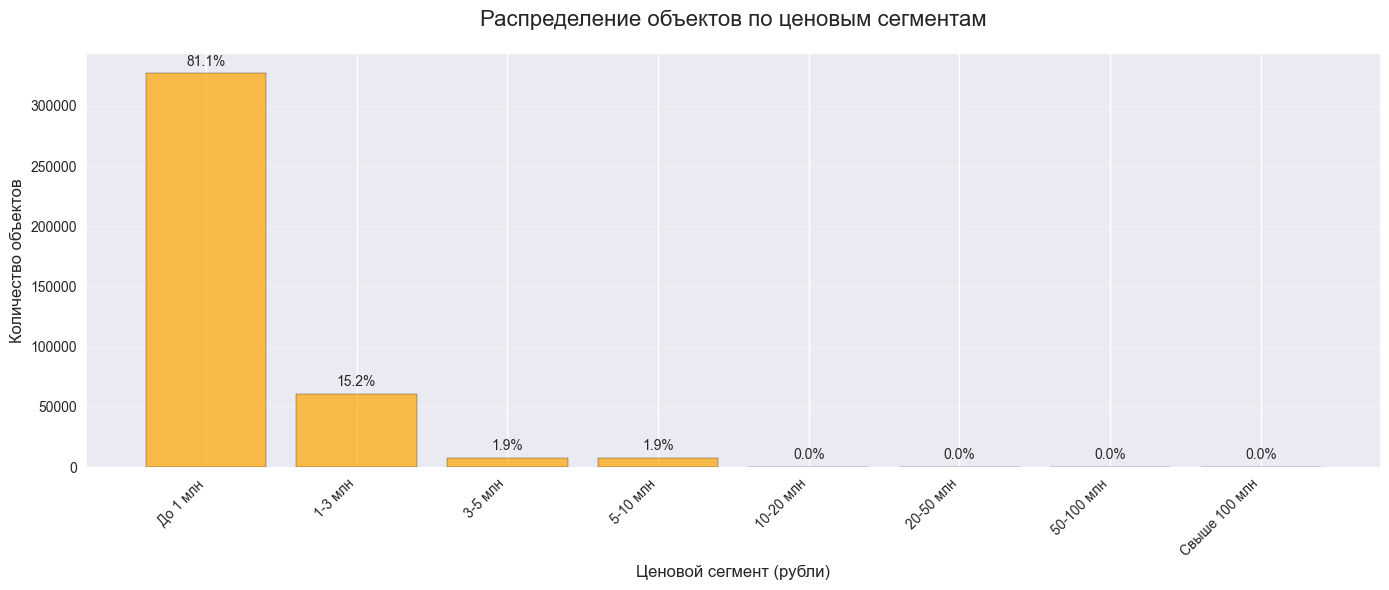

In [133]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16, 12))

print(f"Общее количество объектов: {len(df):,}")
plt.figure(figsize=(14, 6))

# Создаем ценовые категории
price_bins = [0, 1_000_000, 3_000_000, 5_000_000, 10_000_000, 20_000_000, 50_000_000, 100_000_000, np.inf]
price_labels = [
    'До 1 млн', '1-3 млн', '3-5 млн', '5-10 млн', 
    '10-20 млн', '20-50 млн', '50-100 млн', 'Свыше 100 млн'
]

df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)
price_category_counts = df['price_category'].value_counts().sort_index()

plt.bar(price_category_counts.index, price_category_counts.values, 
        alpha=0.7, color='orange', edgecolor='black')
plt.title('Распределение объектов по ценовым сегментам', fontsize=16, pad=20)
plt.xlabel('Ценовой сегмент (рубли)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Добавляем проценты на столбцы
total = len(df)
for i, count in enumerate(price_category_counts.values):
    percentage = (count / total) * 100
    plt.text(i, count + total * 0.01, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Топ-5 самых распространенных вариантов этажности:
1. 1 этажей: 4,929 домов (1.2%)
2. 2 этажей: 27,663 домов (6.9%)
3. 3 этажей: 77,882 домов (19.3%)
4. 4 этажей: 110,995 домов (27.5%)
5. 5 этажей: 70,068 домов (17.4%)

Топ-5 самых распространенных этажей:
1. 0 этаж: 57,786 квартир (14.3%)
2. 1 этаж: 72,427 квартир (18.0%)
3. 2 этаж: 120,804 квартир (30.0%)
4. 3 этаж: 52,657 квартир (13.1%)
5. 4 этаж: 34,998 квартир (8.7%)


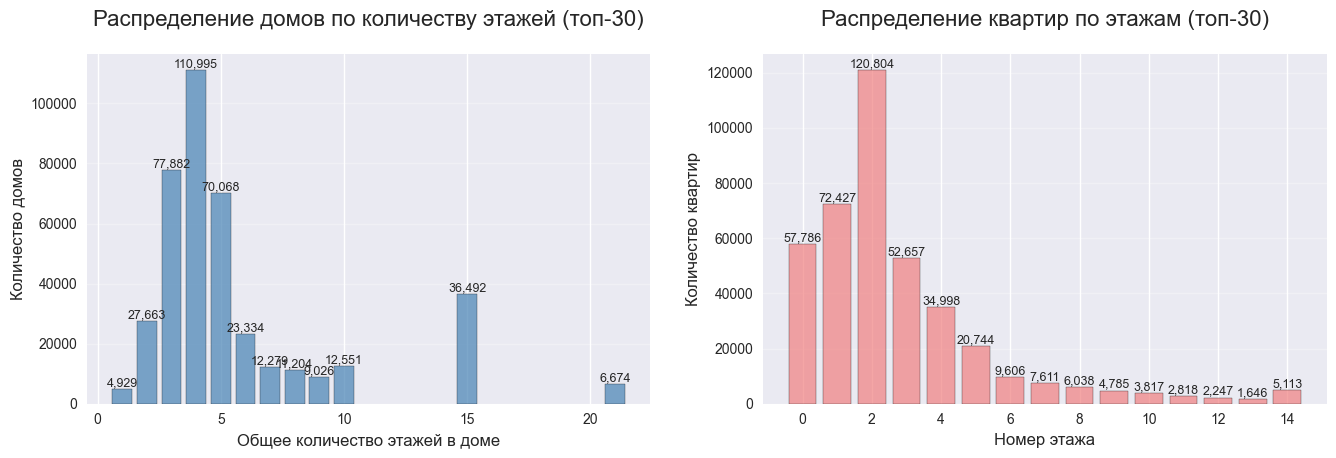

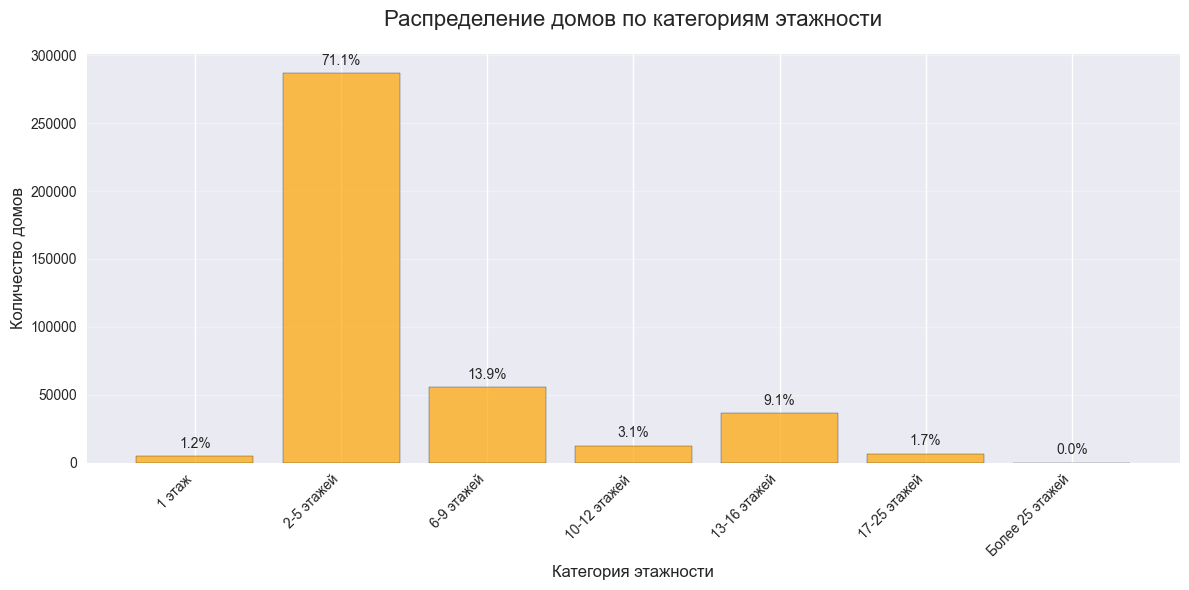

In [134]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
floor_counts = df['total_floor_count'].value_counts().sort_index()

floor_counts_top = floor_counts.head(30)

bars = plt.bar(floor_counts_top.index, floor_counts_top.values, alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Распределение домов по количеству этажей (топ-30)', fontsize=16, pad=20)
plt.xlabel('Общее количество этажей в доме', fontsize=12)
plt.ylabel('Количество домов', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)

plt.subplot(2, 2, 2)
floor_no_counts = df['floor_no'].value_counts().sort_index()
# Ограничим отображение для лучшей читаемости
floor_no_top = floor_no_counts.head(30)

bars = plt.bar(floor_no_top.index, floor_no_top.values, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Распределение квартир по этажам (топ-30)', fontsize=16, pad=20)
plt.xlabel('Номер этажа', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)

print("\nТоп-5 самых распространенных вариантов этажности:")
for i, (floors, count) in enumerate(floor_counts.head(5).items(), 1):
    print(f"{i}. {floors} этажей: {count:,} домов ({(count/len(df)*100):.1f}%)")

print("\nТоп-5 самых распространенных этажей:")
for i, (floor, count) in enumerate(floor_no_counts.head(5).items(), 1):
    print(f"{i}. {floor} этаж: {count:,} квартир ({(count/len(df)*100):.1f}%)")

plt.figure(figsize=(12, 6))

floor_bins = [0, 1, 5, 9, 12, 16, 25, np.inf]
floor_labels = [
    '1 этаж', '2-5 этажей', '6-9 этажей', '10-12 этажей', 
    '13-16 этажей', '17-25 этажей', 'Более 25 этажей'
]

df['floor_category'] = pd.cut(df['total_floor_count'], bins=floor_bins, labels=floor_labels)
floor_category_counts = df['floor_category'].value_counts().sort_index()

bars = plt.bar(floor_category_counts.index, floor_category_counts.values, 
               alpha=0.7, color='orange', edgecolor='black')
plt.title('Распределение домов по категориям этажности', fontsize=16, pad=20)
plt.xlabel('Категория этажности', fontsize=12)
plt.ylabel('Количество домов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

total = len(df)
for i, count in enumerate(floor_category_counts.values):
    percentage = (count / total) * 100
    plt.text(i, count + total * 0.01, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Распределение объектов по времени на рынке

<Figure size 1600x1000 with 0 Axes>

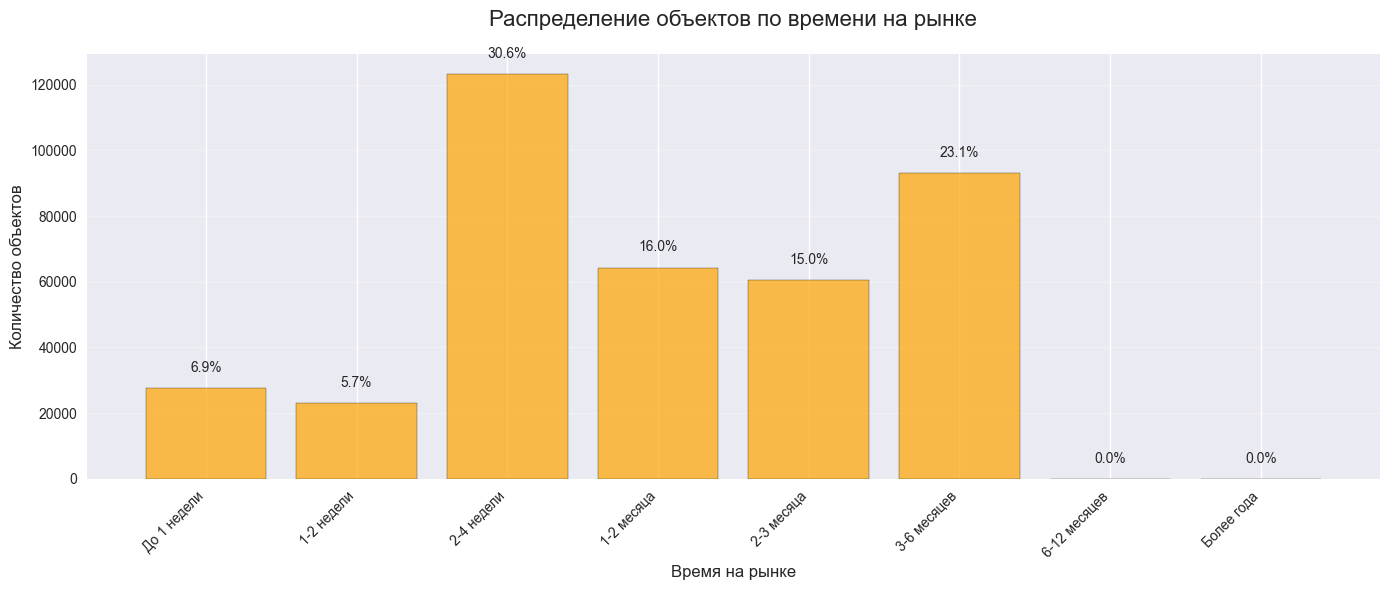

In [136]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16, 10))


plt.figure(figsize=(14, 6))

tom_bins = [0, 7, 14, 30, 60, 90, 180, 365, np.inf]
tom_labels = [
    'До 1 недели', '1-2 недели', '2-4 недели', '1-2 месяца', 
    '2-3 месяца', '3-6 месяцев', '6-12 месяцев', 'Более года'
]

df['tom_category'] = pd.cut(df['tom'], bins=tom_bins, labels=tom_labels)
tom_category_counts = df['tom_category'].value_counts().sort_index()

bars = plt.bar(tom_category_counts.index, tom_category_counts.values, 
               alpha=0.7, color='orange', edgecolor='black')
plt.title('Распределение объектов по времени на рынке', fontsize=16, pad=20)
plt.xlabel('Время на рынке', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Добавляем проценты на столбцы
total = len(df)
for i, count in enumerate(tom_category_counts.values):
    percentage = (count / total) * 100
    plt.text(i, count + total * 0.01, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Средняя цена по типу отопления

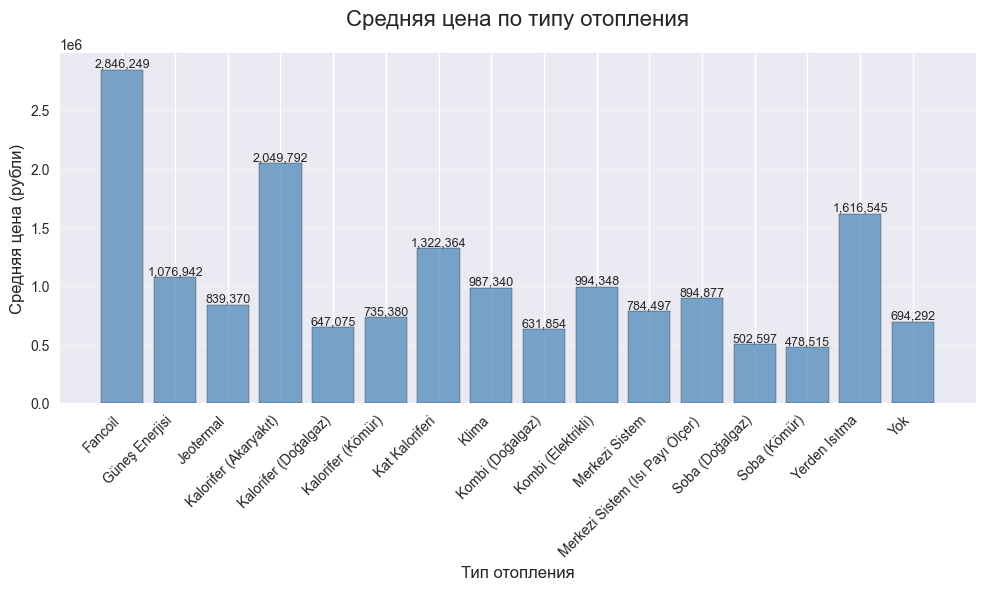

In [138]:
heating_mapping_reverse = {
    1: 'Fancoil',
    2: 'Güneş Enerjisi',
    3: 'Jeotermal',
    4: 'Kalorifer (Akaryakıt)',
    5: 'Kalorifer (Doğalgaz)',
    6: 'Kalorifer (Kömür)',
    7: 'Kat Kaloriferi',
    8: 'Klima',
    9: 'Kombi (Doğalgaz)',
    10: 'Kombi (Elektrikli)',
    11: 'Merkezi Sistem',
    12: 'Merkezi Sistem (Isı Payı Ölçer)',
    13: 'Soba (Doğalgaz)',
    14: 'Soba (Kömür)',
    15: 'Yerden Isıtma',
    16: 'Yok'
}

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(26, 10))

plt.subplot(2, 2, 1)
heating_price = df.groupby('heating_type')['price'].mean().reset_index()
heating_price['heating_name'] = heating_price['heating_type'].map(heating_mapping_reverse)

bars = plt.bar(heating_price['heating_name'], heating_price['price'], 
               alpha=0.7, color='steelblue', edgecolor='black')
plt.title('Средняя цена по типу отопления', fontsize=16, pad=20)
plt.xlabel('Тип отопления', fontsize=12)
plt.ylabel('Средняя цена (рубли)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=9)


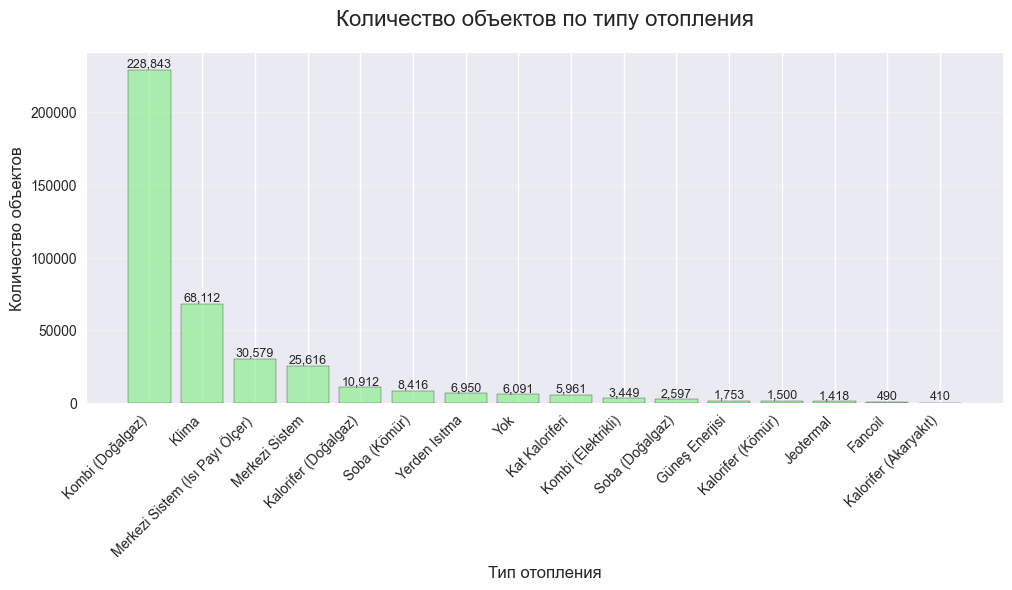

In [139]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(26, 10))

plt.subplot(2, 2, 3)
heating_counts = df['heating_type'].value_counts().reset_index()
heating_counts.columns = ['heating_type', 'count']
heating_counts['heating_name'] = heating_counts['heating_type'].map(heating_mapping_reverse)

bars = plt.bar(heating_counts['heating_name'], heating_counts['count'], 
               alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Количество объектов по типу отопления', fontsize=16, pad=20)
plt.xlabel('Тип отопления', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=9)


## Обучение моделей

### Регрессия

Импортируем train_test_split и разделим данные на обучающую и тестовую выборки

In [143]:
import pandas as pd
import numpy as np

In [144]:
df = pd.read_csv("models_learning_data.csv")
df.dtypes

id                     int64
sub_type               int64
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age           int64
total_floor_count      int64
floor_no               int64
room_count             int64
size                 float64
heating_type           int64
price                float64
price_currency         int64
city                   int64
district               int64
neighborhood           int64
dtype: object

Исключим id, start_date и end_date

In [146]:
Y = df["price"]
X = df.drop(columns=["id", "start_date", "end_date", "price"], axis=1)
X.head(1)

,sub_type,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price_currency,city,district,neighborhood
0,1,2,30,0,21,2,3,90.0,1,1,1,1,1


Импортируем train_test_split и разделим данные на обучающую и тестовую выборки

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"{X_train.shape}\n{X_test.shape}")

(322477, 13)
(80620, 13)


Импортируем модели регрессии

In [151]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Далее обучим каждую модель

In [153]:
%%time
bagging_regressor = BaggingRegressor()
bagging_regressor.fit(X_train, y_train);
bagging_regressor_predict = bagging_regressor.predict(X_test)

CPU times: total: 12.8 s
Wall time: 12.8 s


In [154]:
%%time
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train);
linear_regression_predict = linear_regression.predict(X_test)

CPU times: total: 109 ms
Wall time: 94 ms


In [155]:
%%time
k_neighbors_regressor = KNeighborsRegressor()
k_neighbors_regressor.fit(X_train, y_train);
k_neighbors_regressor_predict = k_neighbors_regressor.predict(X_test)

CPU times: total: 2.84 s
Wall time: 2.83 s


In [156]:
%%time
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train);
random_forest_regressor_predict = random_forest_regressor.predict(X_test)

CPU times: total: 2min 3s
Wall time: 2min 3s


In [157]:
%%time
extreme_gradient_boosting_regressor = XGBRegressor()
extreme_gradient_boosting_regressor.fit(X_train, y_train);
extreme_gradient_boosting_regressor_predict = extreme_gradient_boosting_regressor.predict(X_test)

CPU times: total: 5.31 s
Wall time: 469 ms


Модели обучены, теперь сравним их с помощью r2_score, а так же возьмём mean_squared_error и mean_absolute_error

Для оценки качества моделей необходимо понимать метрики оценки моделей. <br>
Для простоты можно сказать, что r2_score сравнивает модель с простым предсказанием среднего значения

_>_ 0 -> модель предсказывает лучше по сравнению с среднем значением <br>
< 0 -> предсказания хуже, по сравнению с средним значением

Так как значения давольно большие, метрика mean_squared_error не совсем объективная

Импортируем методы расчёта метрик и создадми метод для удобного оценивания моделей

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [164]:
def print_metrics(y_test, y_pred):
    print(mean_squared_error(y_test, y_pred))
    print(mean_absolute_error(y_test, y_pred))
    print(r2_score(y_test, y_pred))

In [165]:
print_metrics(y_test, bagging_regressor_predict)

233269540094.33932
170045.53002618012
0.835621440448022


In [166]:
print_metrics(y_test, linear_regression_predict)

837125491927.2107
477728.5326597922
0.4101009395758004


In [167]:
print_metrics(y_test, k_neighbors_regressor_predict)

1038779531332.5131
512108.8541490945
0.26800094438621924


In [168]:
print_metrics(y_test, random_forest_regressor_predict)

209805780073.5722
161026.94391877585
0.8521556997959298


In [169]:
print_metrics(y_test, extreme_gradient_boosting_regressor_predict)

287594901414.82
233156.64244110044
0.797339868677486


По метрике r2_score, лучшей моделью является RandomForestRegressor, так же высокий показатель у BaggingRegressor

Сохраним модель для предсказания

In [172]:
from joblib import dump

dump(random_forest_regressor, "Models/RandomForestRegressor.joblib");

### Классификация

Разделим данные на обучающую и тестовую выборки

In [175]:
Y = df["sub_type"]
X = df.drop(columns=["id", "start_date", "end_date", "sub_type"], axis=1)
X.head(1)

,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price,price_currency,city,district,neighborhood
0,2,30,0,21,2,3,90.0,1,8750.0,1,1,1,1


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

Импортируем модели классификации

In [178]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Далее обучим каждую модель

In [180]:
%%time
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train, y_train);
bagging_classifier_predict = bagging_classifier.predict(X_test)

CPU times: total: 12.8 s
Wall time: 12.8 s


In [181]:
%%time
k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X_train, y_train);
k_neighbors_classifier_predict = k_neighbors_classifier.predict(X_test)

CPU times: total: 3.64 s
Wall time: 3.63 s


In [182]:
%%time
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train);
decision_tree_classifier_predict = decision_tree_classifier.predict(X_test)

CPU times: total: 1.86 s
Wall time: 1.86 s


In [183]:
%%time
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train);
random_forest_classifier_predict = random_forest_classifier.predict(X_test)

CPU times: total: 34.6 s
Wall time: 34.6 s


Модели обучены, сравним их метрики

Для оценки качества моделей необходимо понимать метрики оценки моделей.

Precision и Recall можно описать следующим образом:

Precision - "Сколько выбранных элементов являются релевантными" <br>
Recall - "Сколько релевантных элементов выбранно" <br>
Precision демонстрирует способность алгоритма отличать один класс от других классов, а Recall демонстрирует способность алгоритма обнаруживать данный класс.

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.

F1-score — это среднее между Precision и Recall, которое используется для оценки баланса между точностью и полнотой модели. Он особенно полезен в задачах с несбалансированными классами.

Поскольку классы несбалансированными, для оценки качества обучения, как основную метрику, будем использовать F1-score.

In [186]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(y_test, bagging_classifier_predict))

              precision    recall  f1-score   support

           1       0.75      0.56      0.64      1593
           2       0.97      0.99      0.98     70867
           3       0.77      0.82      0.79      4207
           4       0.71      0.51      0.59      1920
           5       1.00      0.36      0.53        11
           6       0.67      0.49      0.57      1192
           7       0.82      0.59      0.69       495
           8       0.83      0.74      0.78       138
           9       0.73      0.47      0.57        51
          10       0.74      0.44      0.55        97
          11       0.88      0.35      0.50        43
          12       0.00      0.00      0.00         6

    accuracy                           0.95     80620
   macro avg       0.74      0.53      0.60     80620
weighted avg       0.94      0.95      0.94     80620



F:\Alfamod\Programs\Anaconda2024.10-1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Alfamod\Programs\Anaconda2024.10-1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Alfamod\Programs\Anaconda2024.10-1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [188]:
print(classification_report(y_test, k_neighbors_classifier_predict))

              precision    recall  f1-score   support

           1       0.46      0.23      0.31      1593
           2       0.93      0.98      0.95     70867
           3       0.56      0.47      0.51      4207
           4       0.49      0.15      0.23      1920
           5       0.00      0.00      0.00        11
           6       0.39      0.16      0.23      1192
           7       0.44      0.15      0.22       495
           8       0.65      0.22      0.33       138
           9       0.40      0.12      0.18        51
          10       0.42      0.16      0.24        97
          11       0.57      0.09      0.16        43
          12       0.00      0.00      0.00         6

    accuracy                           0.90     80620
   macro avg       0.44      0.23      0.28     80620
weighted avg       0.87      0.90      0.88     80620



F:\Alfamod\Programs\Anaconda2024.10-1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Alfamod\Programs\Anaconda2024.10-1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Alfamod\Programs\Anaconda2024.10-1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [189]:
print(classification_report(y_test, decision_tree_classifier_predict))

              precision    recall  f1-score   support

           1       0.55      0.57      0.56      1593
           2       0.97      0.97      0.97     70867
           3       0.74      0.76      0.75      4207
           4       0.54      0.53      0.54      1920
           5       0.33      0.36      0.35        11
           6       0.51      0.52      0.52      1192
           7       0.55      0.60      0.57       495
           8       0.66      0.72      0.69       138
           9       0.45      0.55      0.50        51
          10       0.45      0.46      0.45        97
          11       0.47      0.42      0.44        43
          12       0.00      0.00      0.00         6

    accuracy                           0.93     80620
   macro avg       0.52      0.54      0.53     80620
weighted avg       0.93      0.93      0.93     80620



In [190]:
print(classification_report(y_test, random_forest_classifier_predict))

              precision    recall  f1-score   support

           1       0.90      0.50      0.64      1593
           2       0.97      0.99      0.98     70867
           3       0.79      0.85      0.82      4207
           4       0.82      0.52      0.64      1920
           5       1.00      0.36      0.53        11
           6       0.75      0.53      0.62      1192
           7       0.88      0.60      0.71       495
           8       0.91      0.77      0.83       138
           9       0.93      0.49      0.64        51
          10       0.86      0.43      0.58        97
          11       0.94      0.40      0.56        43
          12       1.00      0.17      0.29         6

    accuracy                           0.95     80620
   macro avg       0.89      0.55      0.65     80620
weighted avg       0.95      0.95      0.95     80620



Наилучший показатель F1-score у модели RandomForestClassifier

In [192]:
dump(random_forest_classifier, "Models/RandomForestClassifier.joblib");

## Отчёт по проделанной работе

Была проведена предварительная обработка данных
* Удалён пустой признак
* Заполнены пропущенные значения
* Обработанны анамальные значения

__Проведён графический анализ__

Построен ряд графиков, которые позволяют определить зависимости визуально

__Обучение моделей__

Для регрессии взяты модели BaggingRegressor, LinearRegression, KNeighborsRegressor, а так же RandomForestRegressor и XGBRegressor. <br>
Для оценки качества обучения использована метрика r2_score, как основная.

Наилучший показатель r2_score у модели RandomForestClassifier

__Разработка приложения__:

Разработанно API и веб приложение.
* API разработанно с использованием библиотеки fastapi,
* Веб приложение разработанно на основе streamlit.

Веб приложение содержит:
* Предсказание стоимости недвижимости
* Раздел "Статистика", который содержит дополнительную информацию о наборе данных.